In [1]:
%cd ..

/home/eli/AnacondaProjects/categorical_bpl


In [2]:
import argparse
import collections
import random
import pyro
import torch
import matplotlib.pyplot as plt
import numpy as np
import data_loader.data_loaders as module_data
import model.model as module_arch
from parse_config import ConfigParser
from trainer import Trainer

RDKit WARNING: [12:23:59] Enabling RDKit 2019.09.3 jupyter extensions


In [3]:
%matplotlib inline

In [4]:
# pyro.enable_validation(True)
# torch.autograd.set_detect_anomaly(True)

In [5]:
# fix random seeds for reproducibility
SEED = 123
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(SEED)
random.seed(SEED)

In [6]:
Args = collections.namedtuple('Args', 'config resume device')
config = ConfigParser.from_args(Args(config='chemical_config.json', resume=None, device=None))

In [7]:
logger = config.get_logger('train')

In [8]:
# setup data_loader instances
data_loader = config.init_obj('data_loader', module_data)
valid_data_loader = data_loader.split_validation()

In [9]:
# build model architecture, then print to console
model = config.init_obj('arch', module_arch)

In [10]:
model.resume_from_checkpoint('saved/models/Molecular_VaeCategory/0804_123131/checkpoint-epoch450.pth')

In [11]:
validation_data = random.choice(list(valid_data_loader))[0]

In [12]:
path, prediction_data = model(observations=validation_data, train=False)

In [13]:
prediction_data = prediction_data.view(-1, *model._data_space)

Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral


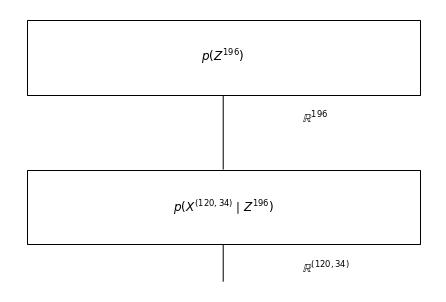

<AxesSubplot:>

In [14]:
path.draw()

In [15]:
path.draw(path='chemical_string_diagram.pdf')

Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral


<AxesSubplot:>

Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral


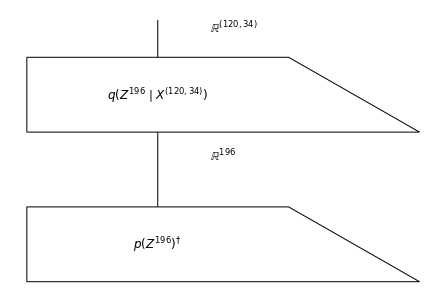

<AxesSubplot:>

In [16]:
path.dagger().draw()

In [17]:
from discopy.biclosed import Ty
import base.base_type as types

In [18]:
model._category.draw(skip_edges=[(Ty(), model.data_space)], notebook=True, filename='chemical_vae_freecat.html')

Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral


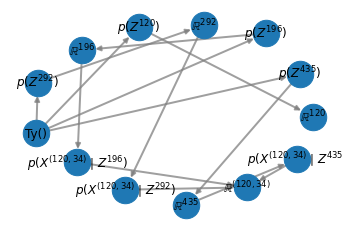

In [19]:
model._category.draw(skip_edges=[(Ty(), model.data_space)], notebook=False,
                     filename='chemical_vae_freecat.pdf')

In [20]:
validation_data.shape

torch.Size([192, 120, 34])

In [21]:
m, reconstructions = model(observations=validation_data, train=False)

In [22]:
(reconstructions == validation_data).all(dim=-1).to(dtype=torch.float).mean(dim=0)

tensor([0.7969, 0.4479, 0.5781, 0.4844, 0.3802, 0.3438, 0.3646, 0.2865, 0.2969,
        0.2917, 0.3542, 0.2396, 0.2760, 0.2188, 0.1823, 0.2448, 0.2865, 0.3021,
        0.3490, 0.2760, 0.2917, 0.3021, 0.3177, 0.2917, 0.2552, 0.2708, 0.2240,
        0.2500, 0.2448, 0.2083, 0.2188, 0.2760, 0.2708, 0.3021, 0.2812, 0.3438,
        0.3646, 0.3802, 0.4115, 0.4740, 0.5625, 0.5677, 0.6198, 0.6406, 0.6667,
        0.7812, 0.8229, 0.8229, 0.8542, 0.8542, 0.8802, 0.9010, 0.9323, 0.9271,
        0.9375, 0.9688, 0.9635, 0.9792, 0.9792, 0.9792, 0.9896, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 

In [23]:
from utils import mol_utils

In [24]:
validation_mols = data_loader.dataset.to_mols(validation_data)
reconstruction_mols = data_loader.dataset.to_mols(reconstructions)

RDKit ERROR: [12:24:09] SMILES Parse Error: syntax error while parsing: c1c1cc(cCc[c(2=Cn2nccCCc2C1cc=C
RDKit ERROR: [12:24:09] SMILES Parse Error: Failed parsing SMILES 'c1c1cc(cCc[c(2=Cn2nccCCc2C1cc=C' for input: 'c1c1cc(cCc[c(2=Cn2nccCCc2C1cc=C'
RDKit ERROR: [12:24:09] SMILES Parse Error: syntax error while parsing: C=C(NCCSc1])(C(1=n2OC)OCC[@@]]22CC(C(]C))Cc222n=2)s1
RDKit ERROR: [12:24:09] SMILES Parse Error: Failed parsing SMILES 'C=C(NCCSc1])(C(1=n2OC)OCC[@@]]22CC(C(]C))Cc222n=2)s1' for input: 'C=C(NCCSc1])(C(1=n2OC)OCC[@@]]22CC(C(]C))Cc222n=2)s1'
RDKit ERROR: [12:24:09] SMILES Parse Error: syntax error while parsing: C=CC()NC@@H1OC[@@H]1)@C=@(N(C)CF1])C)C1(C=)CCNC1=O
RDKit ERROR: [12:24:09] SMILES Parse Error: Failed parsing SMILES 'C=CC()NC@@H1OC[@@H]1)@C=@(N(C)CF1])C)C1(C=)CCNC1=O' for input: 'C=CC()NC@@H1OC[@@H]1)@C=@(N(C)CF1])C)C1(C=)CCNC1=O'
RDKit ERROR: [12:24:09] SMILES Parse Error: syntax error while parsing: Cc1nn(O121=c1]CCCON=C(1NCCC@@]HCCCCCCH))H(CCcC1
RDKit ERROR: 

In [25]:
import logging
import matplotlib.pyplot as plt

Invalid reconstruction!


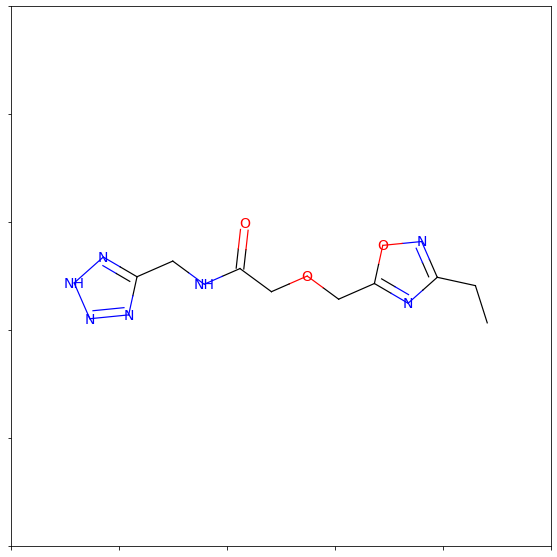

Invalid reconstruction!


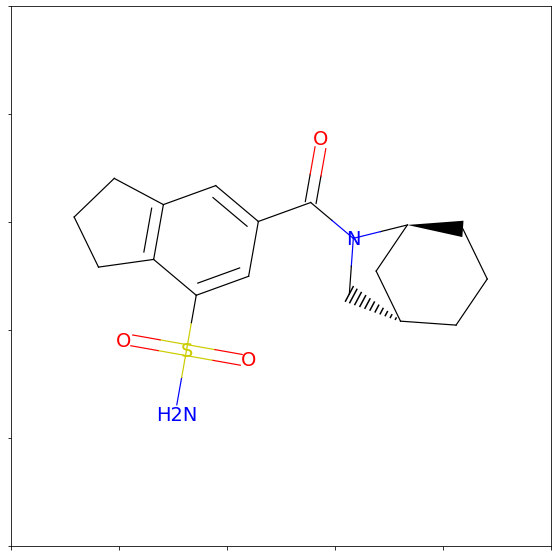

Invalid reconstruction!


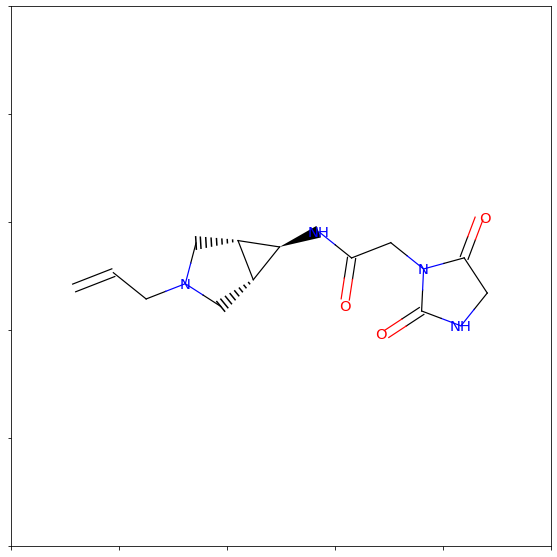

Invalid reconstruction!


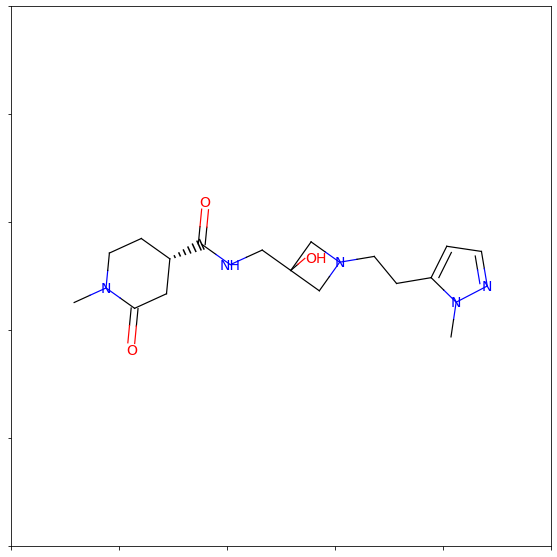

Invalid reconstruction!


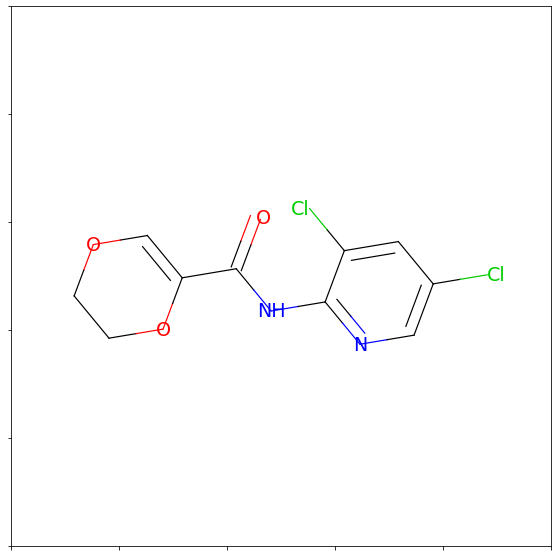

Invalid reconstruction!


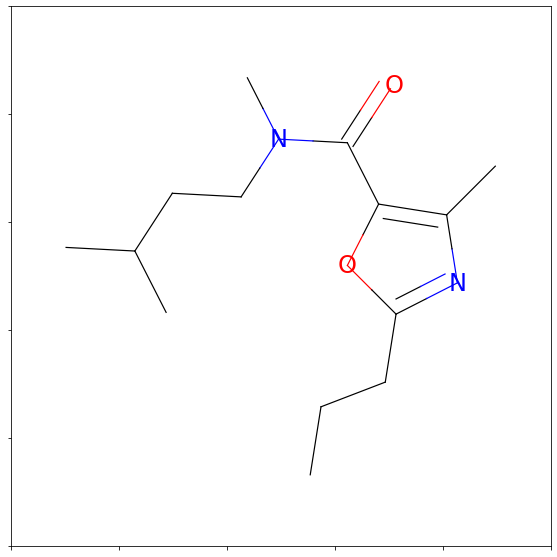

Invalid reconstruction!


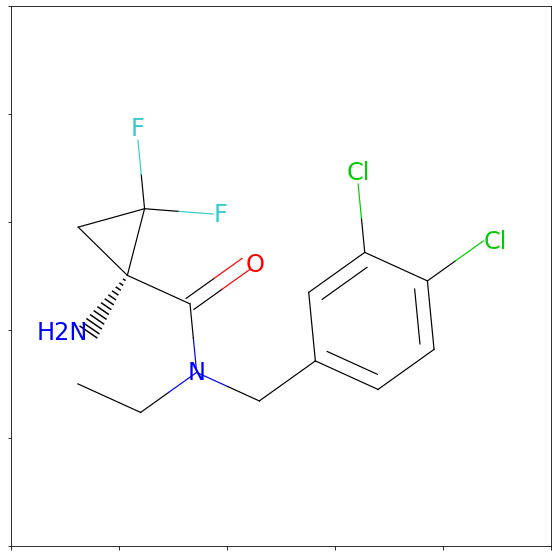

Invalid reconstruction!


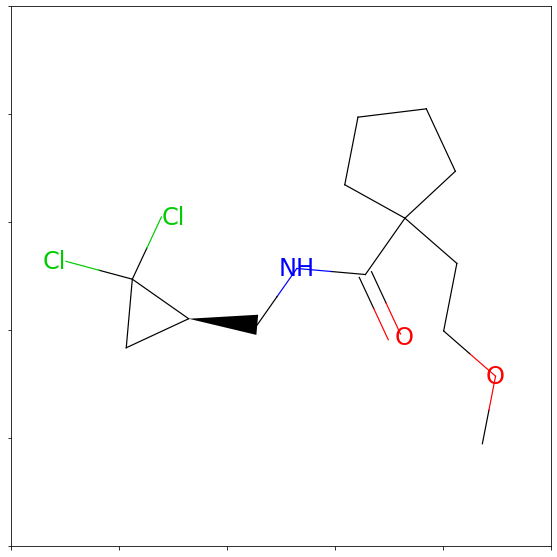

Invalid reconstruction!


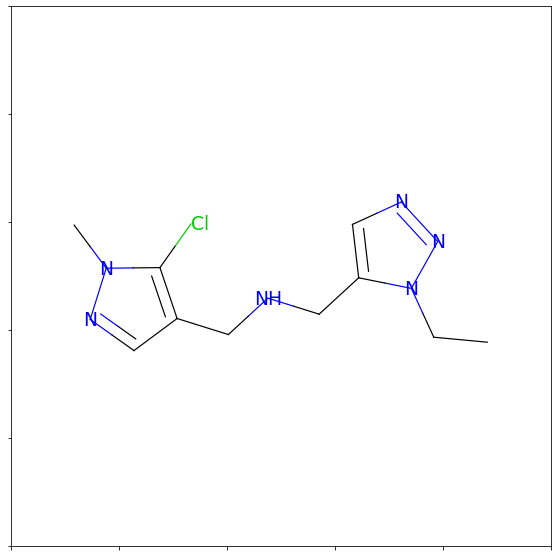

Invalid reconstruction!


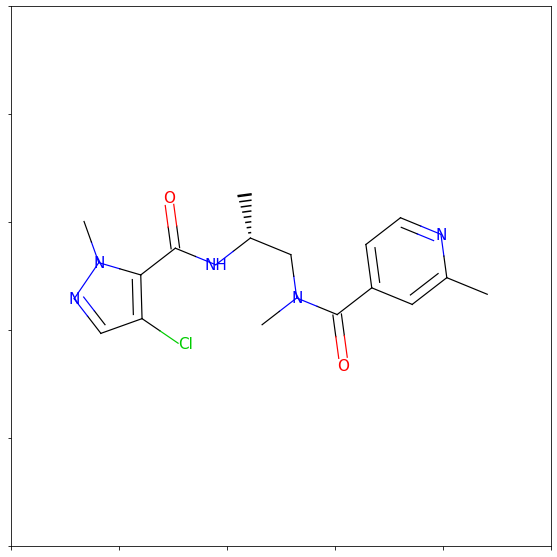

Invalid reconstruction!


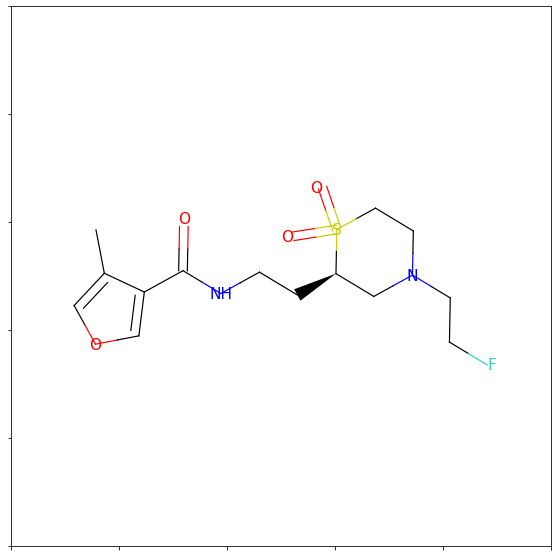

Invalid reconstruction!


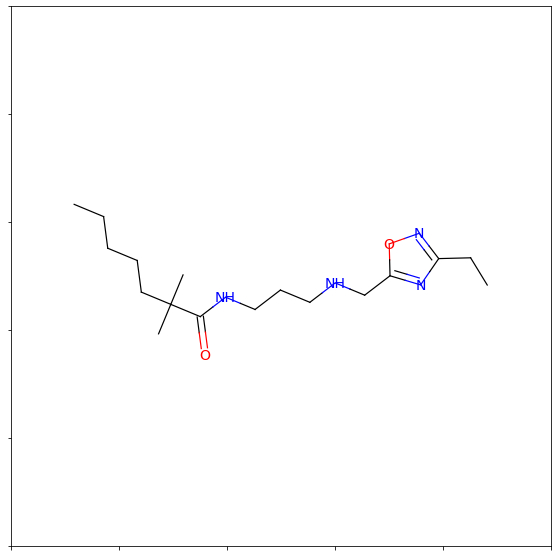

Invalid reconstruction!


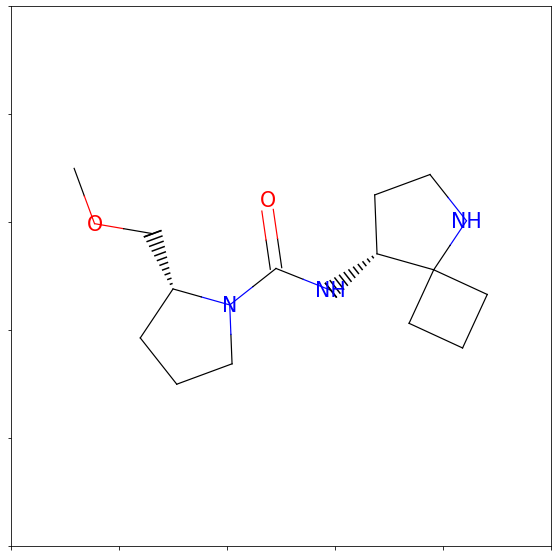

Invalid reconstruction!


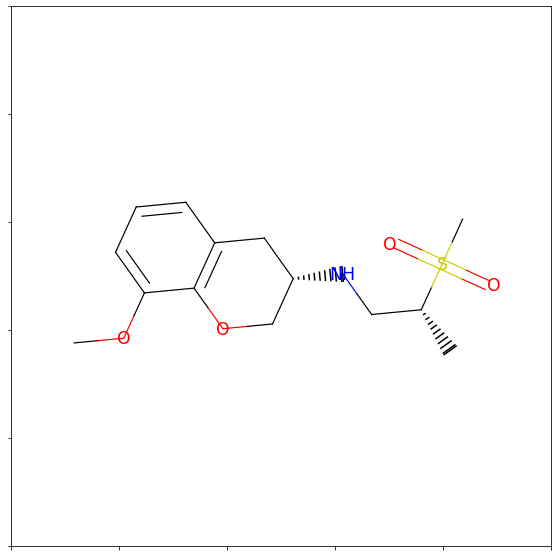

Invalid reconstruction!


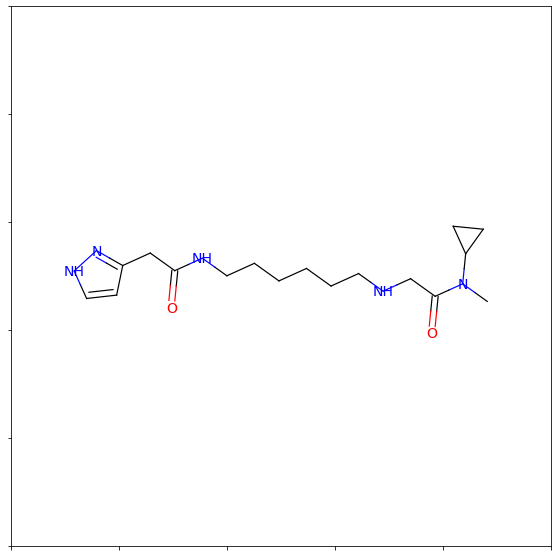

Invalid reconstruction!


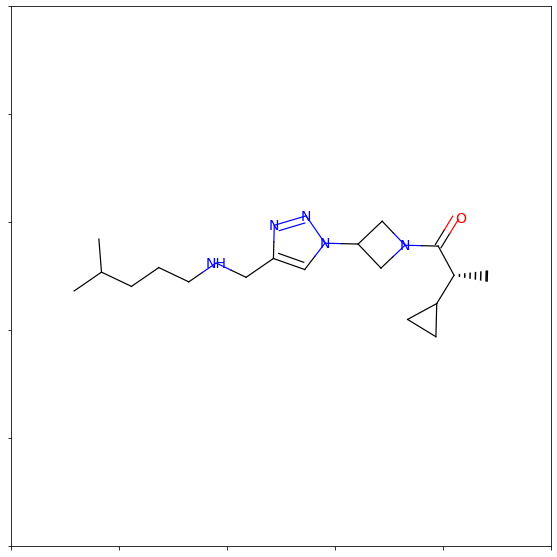

Invalid reconstruction!


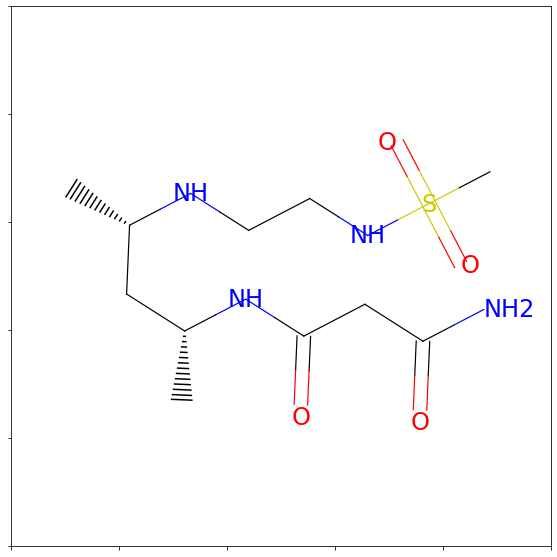

Invalid reconstruction!


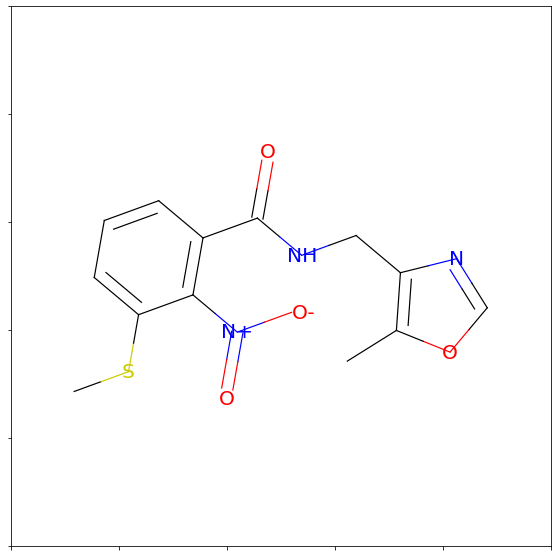

Invalid reconstruction!


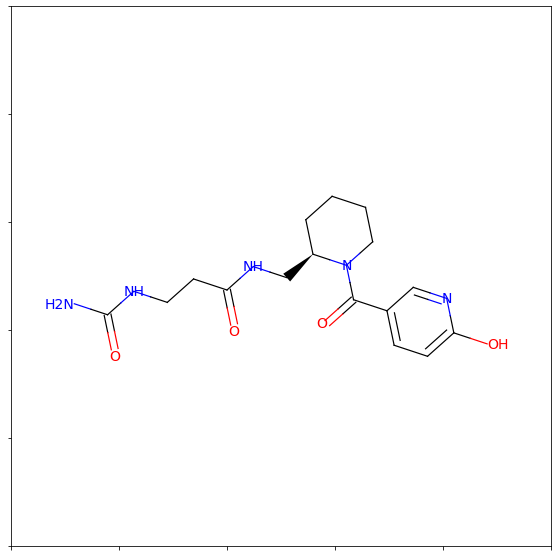

Invalid reconstruction!


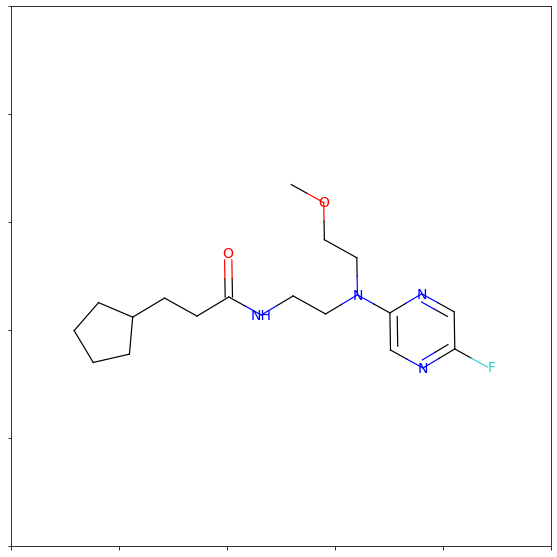

Invalid reconstruction!


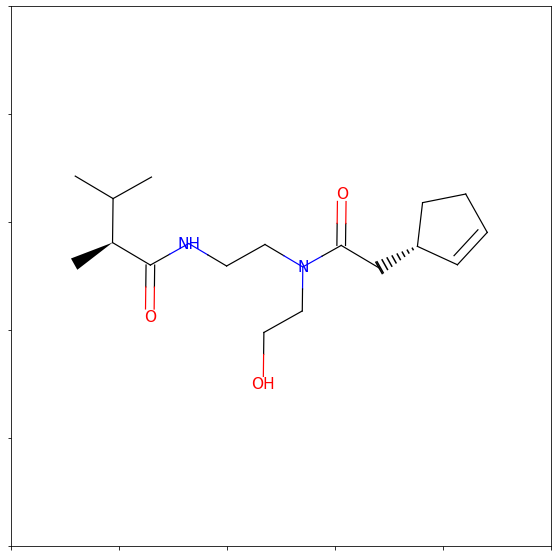

Invalid reconstruction!


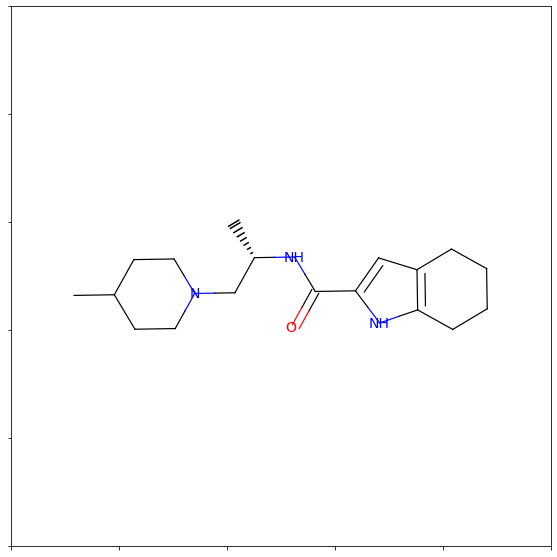

Invalid reconstruction!


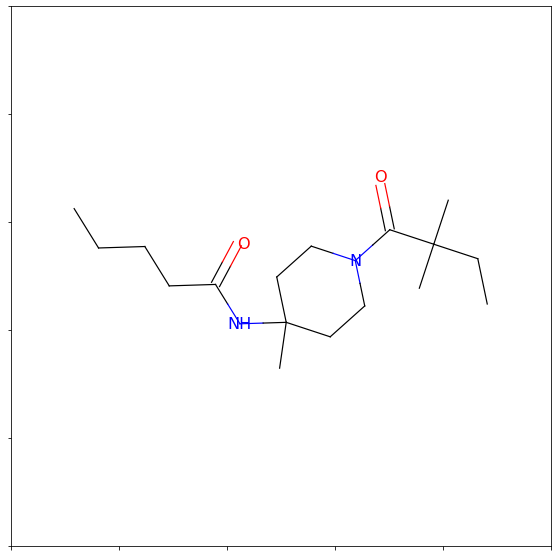

Invalid reconstruction!


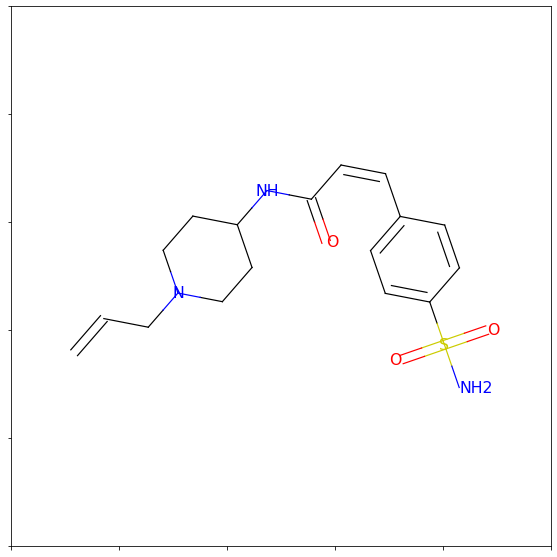

Invalid reconstruction!


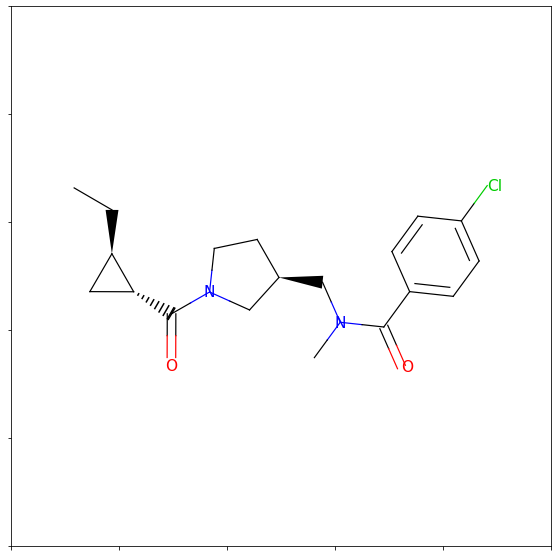

Invalid reconstruction!


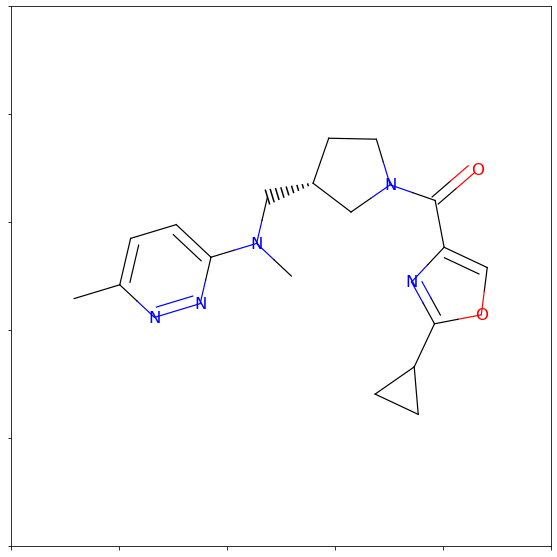

Invalid reconstruction!


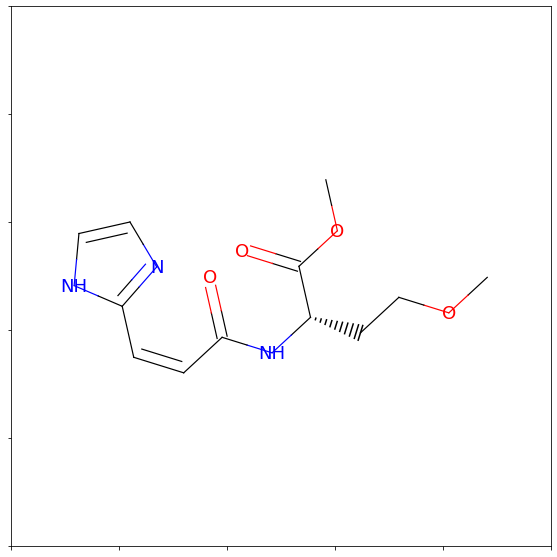

Invalid reconstruction!


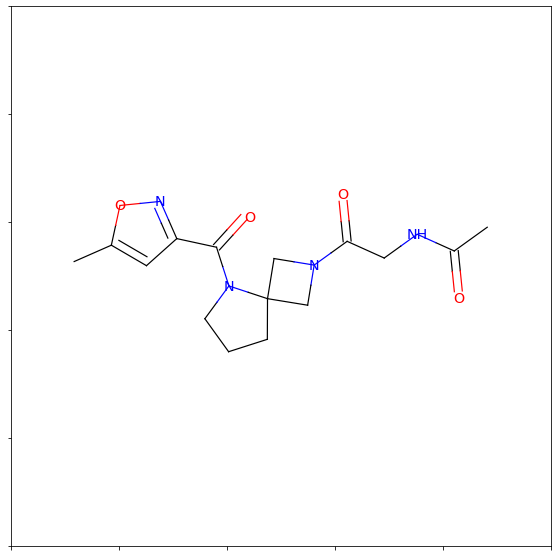

Invalid reconstruction!


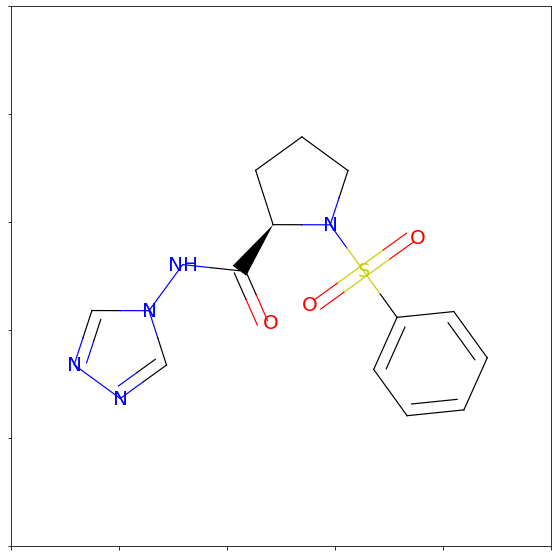

Invalid reconstruction!


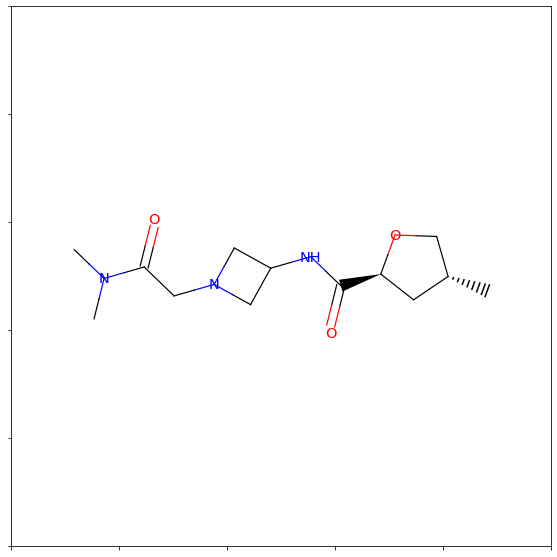

Invalid reconstruction!


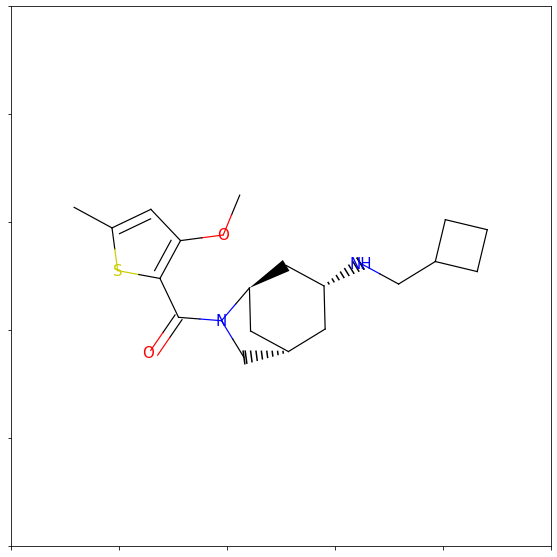

Invalid reconstruction!


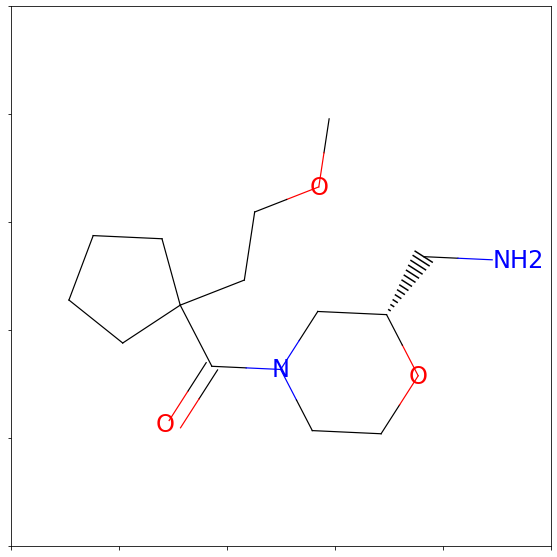

Invalid reconstruction!


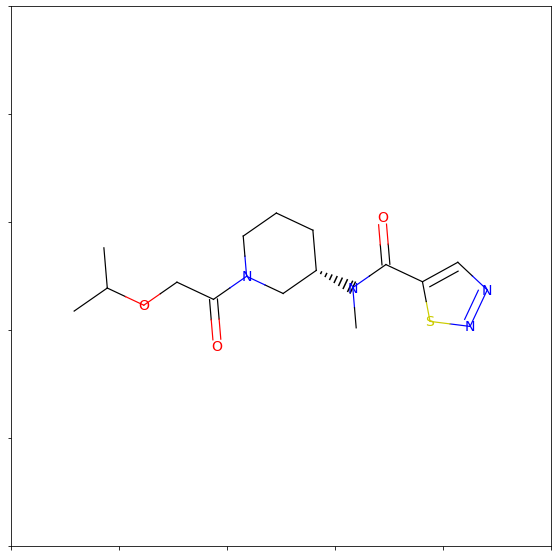

Invalid reconstruction!


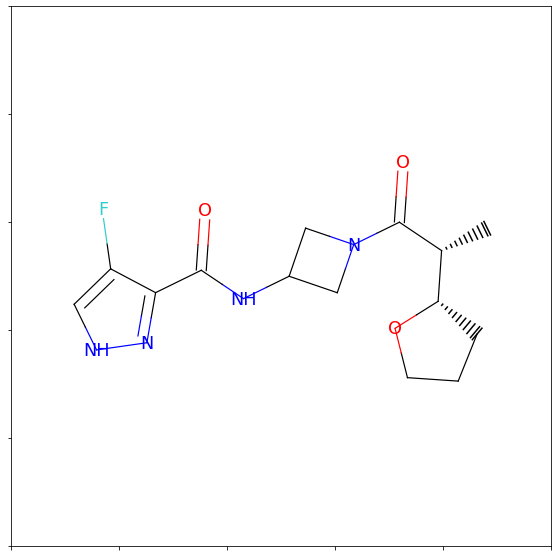

Invalid reconstruction!


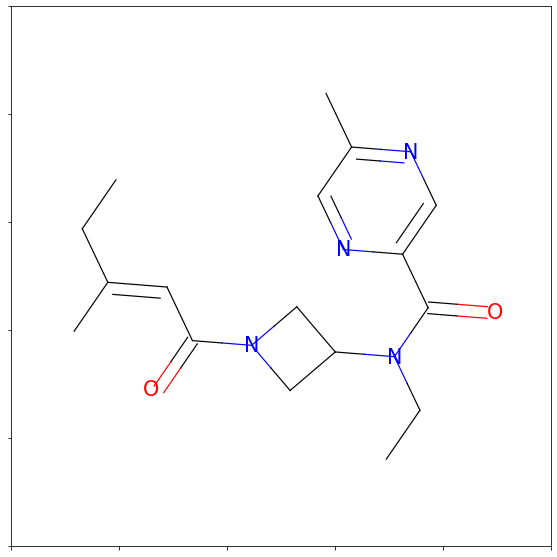

Invalid reconstruction!


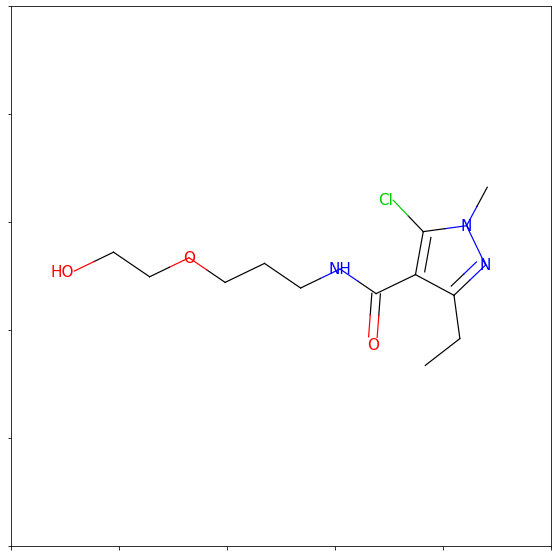

Invalid reconstruction!


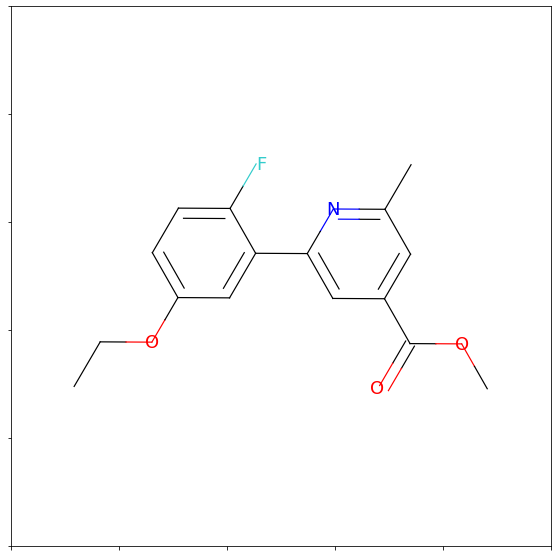

Invalid reconstruction!


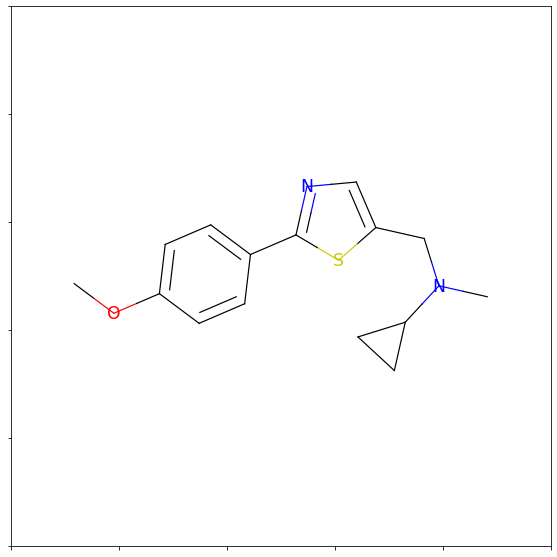

Invalid reconstruction!


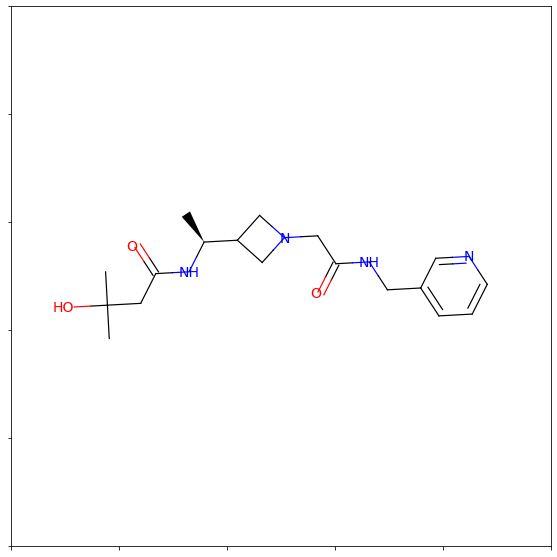

Invalid reconstruction!


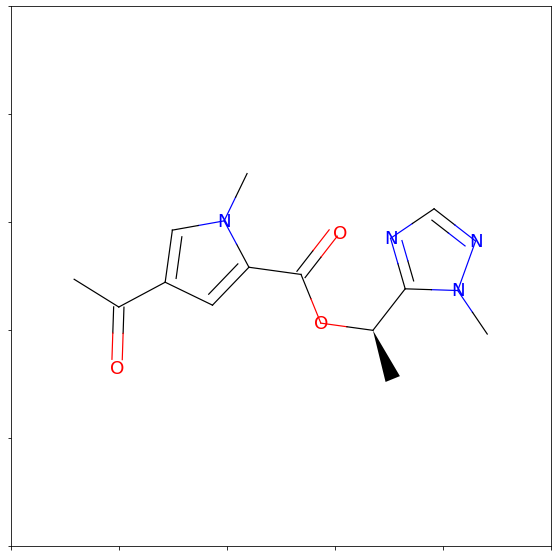

Invalid reconstruction!


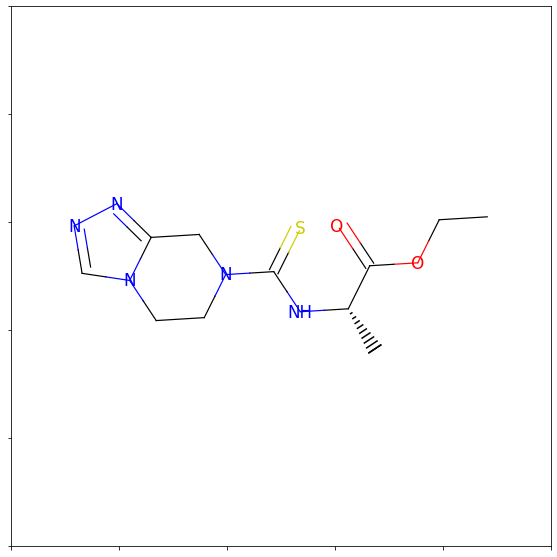

Invalid reconstruction!


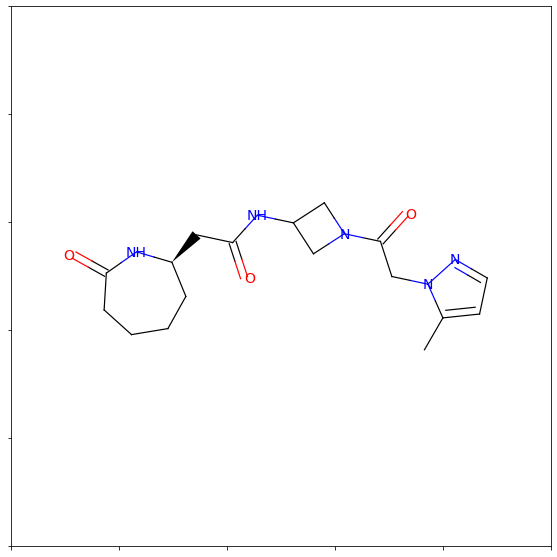

Invalid reconstruction!


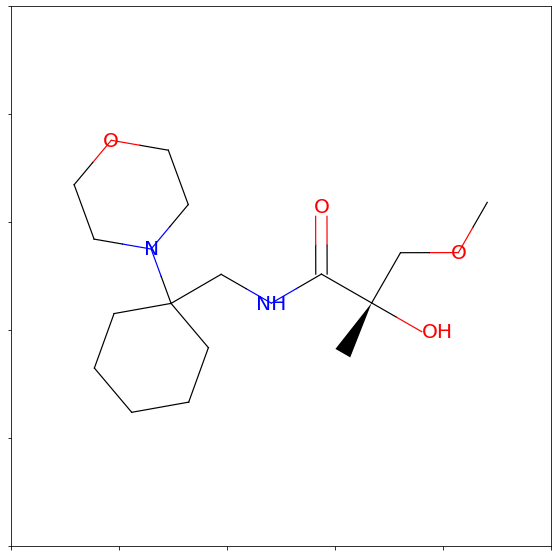

Invalid reconstruction!


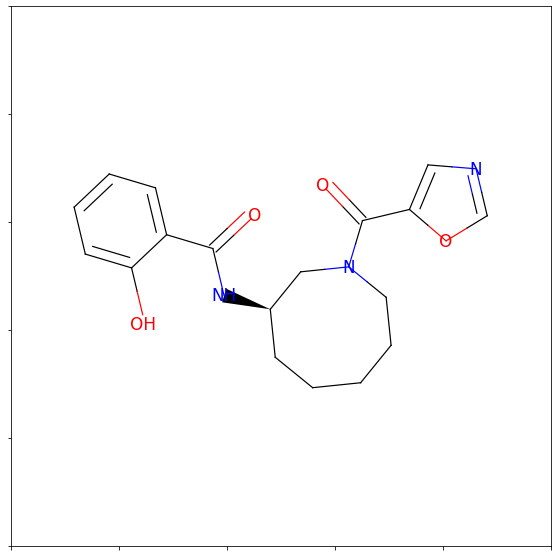

Invalid reconstruction!


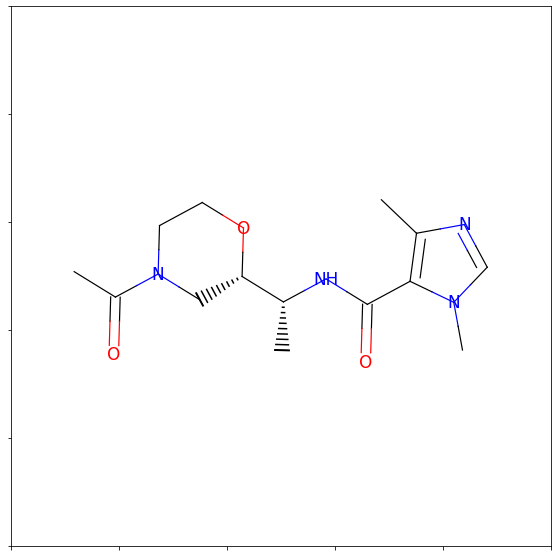

Invalid reconstruction!


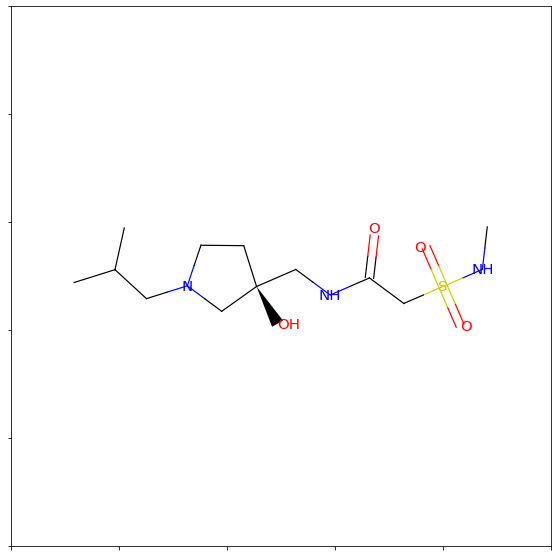

Invalid reconstruction!


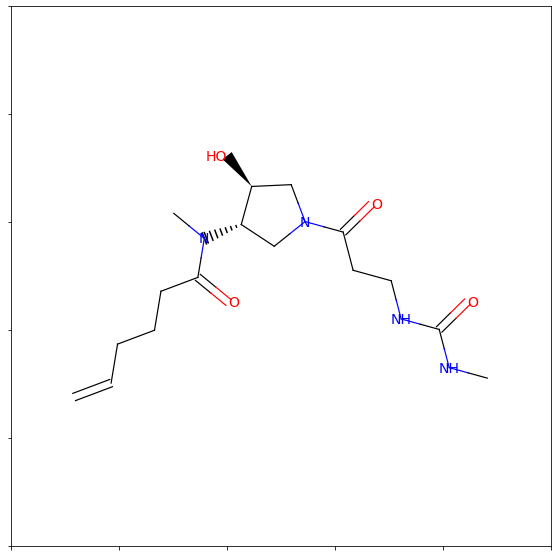

Invalid reconstruction!


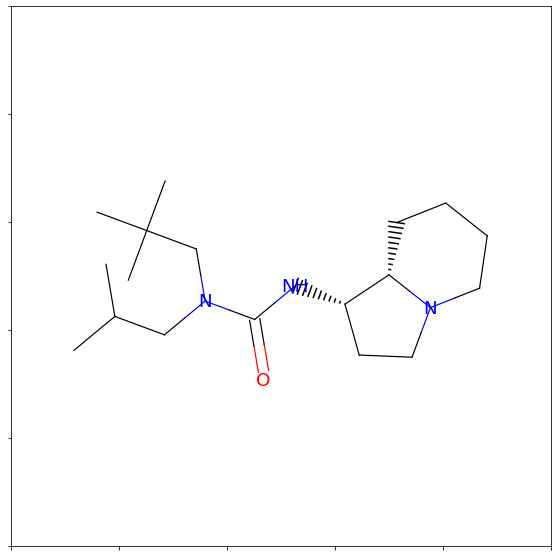

Invalid reconstruction!


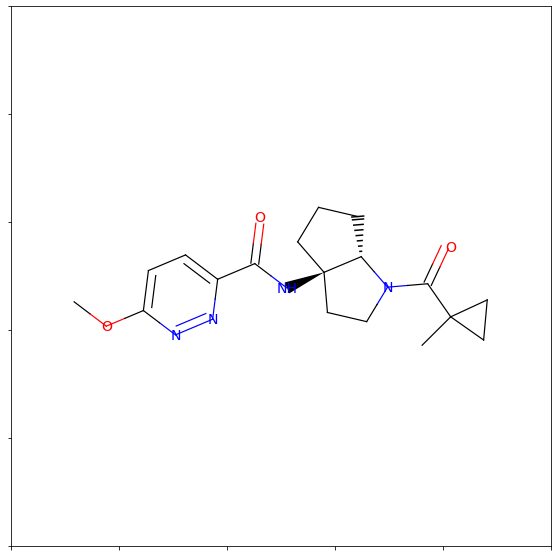

Invalid reconstruction!


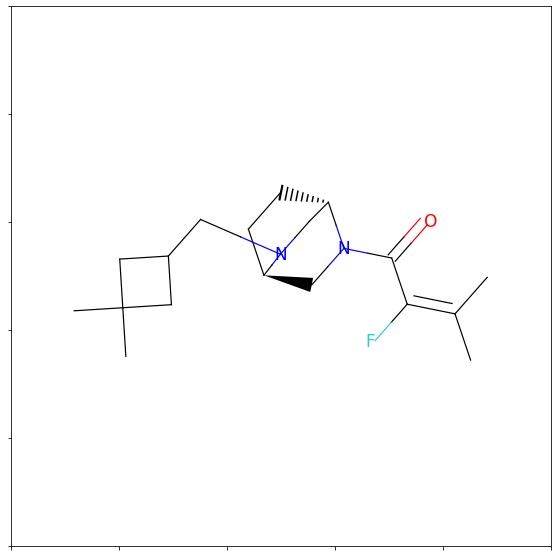

Invalid reconstruction!


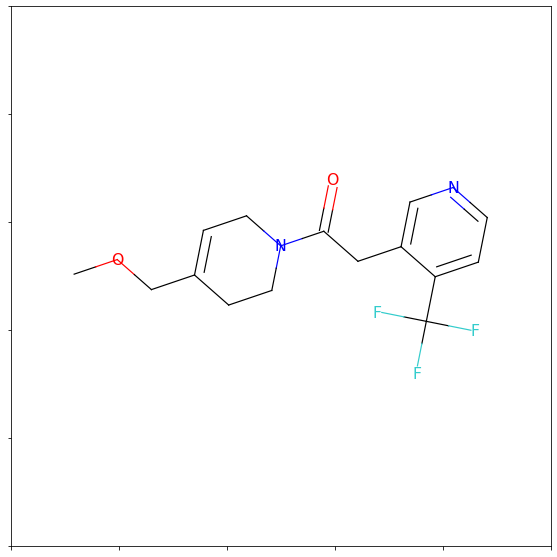

Invalid reconstruction!


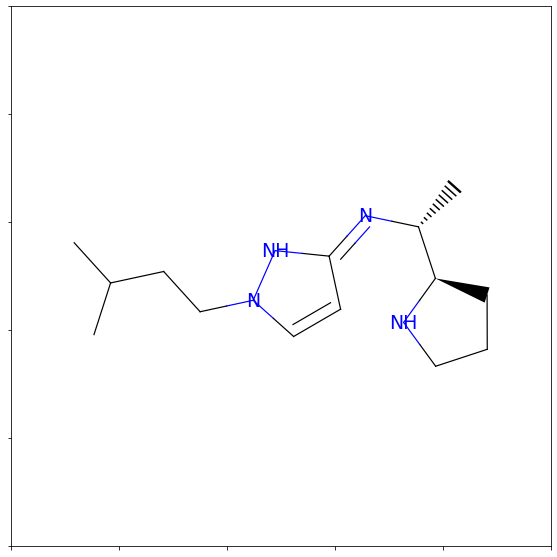

Invalid reconstruction!


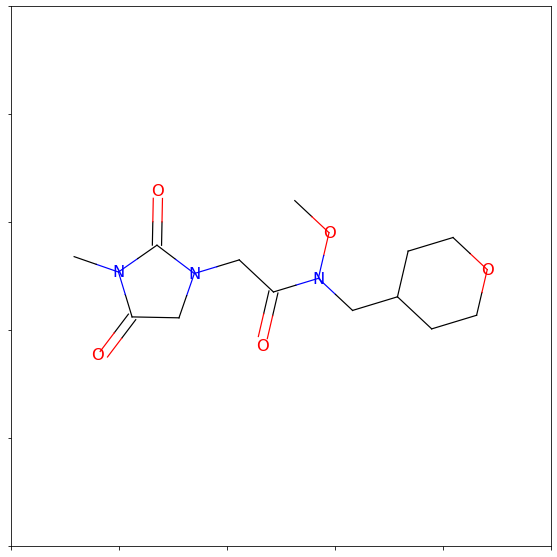

Invalid reconstruction!


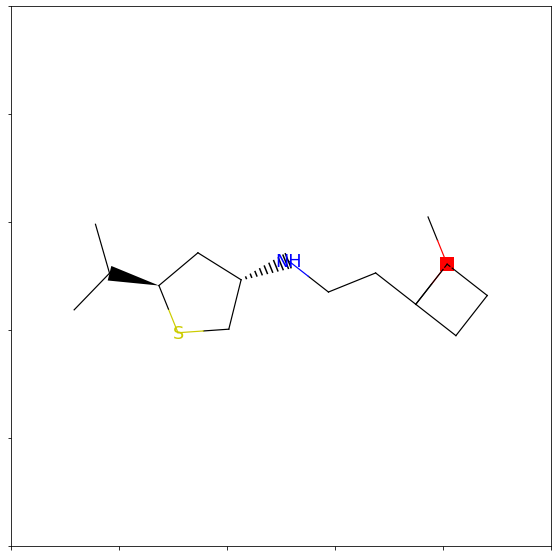

Invalid reconstruction!


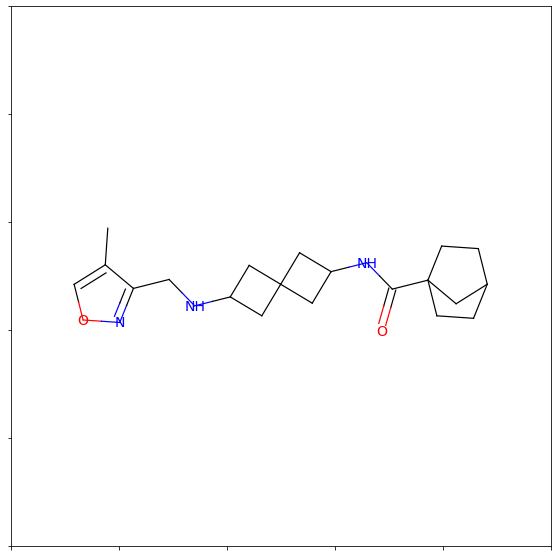

Invalid reconstruction!


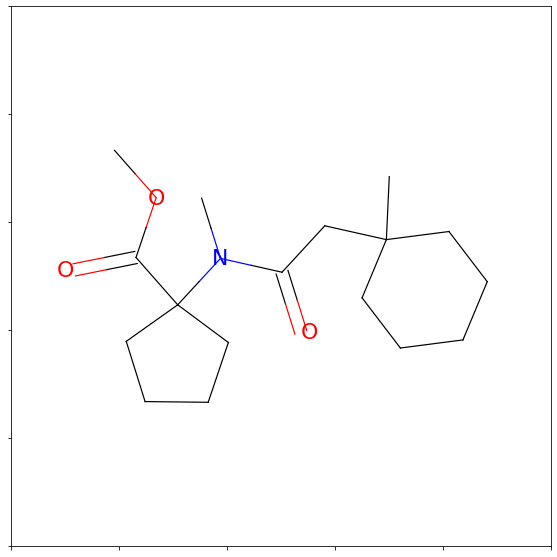

Invalid reconstruction!


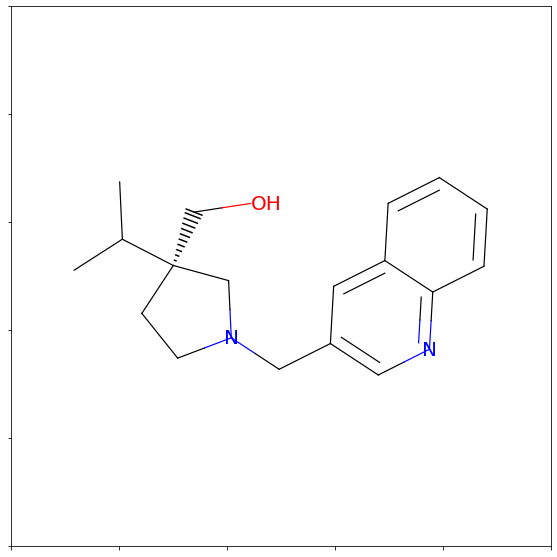

Invalid reconstruction!


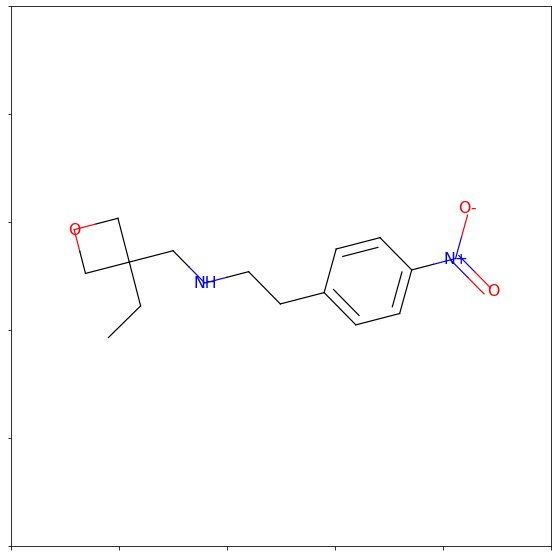

Invalid reconstruction!


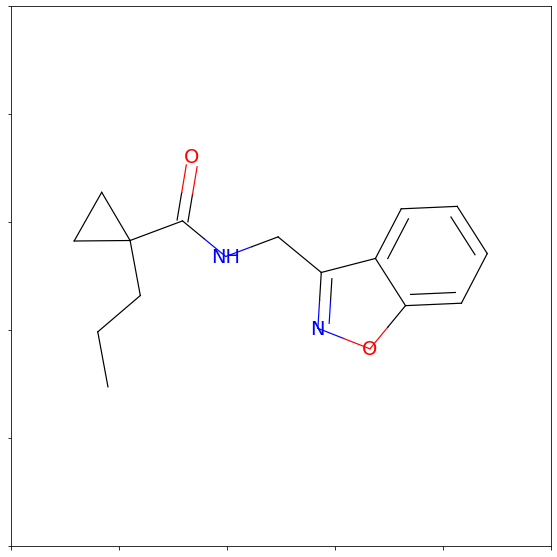

Invalid reconstruction!


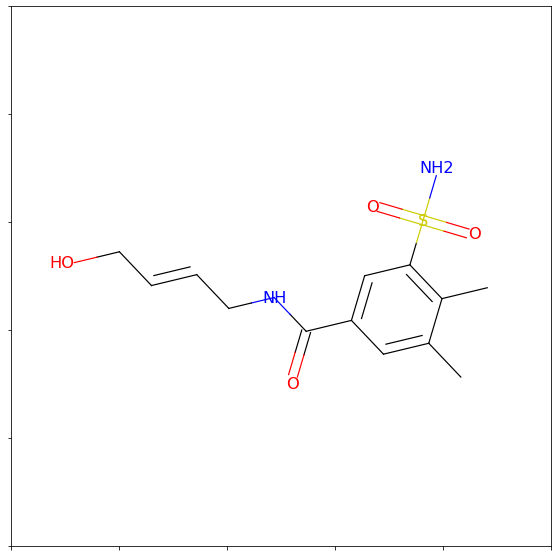

Invalid reconstruction!


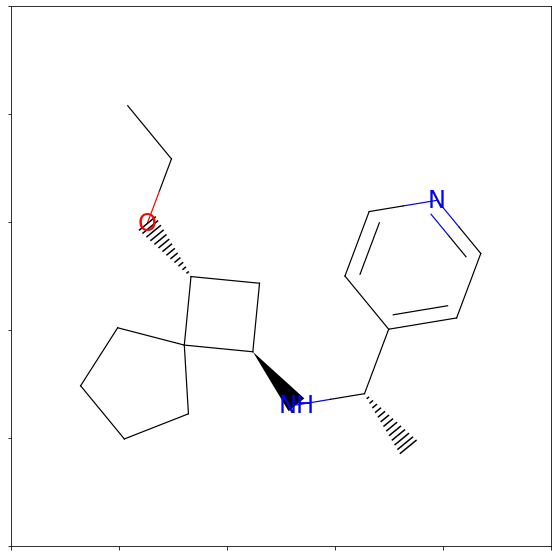

Invalid reconstruction!


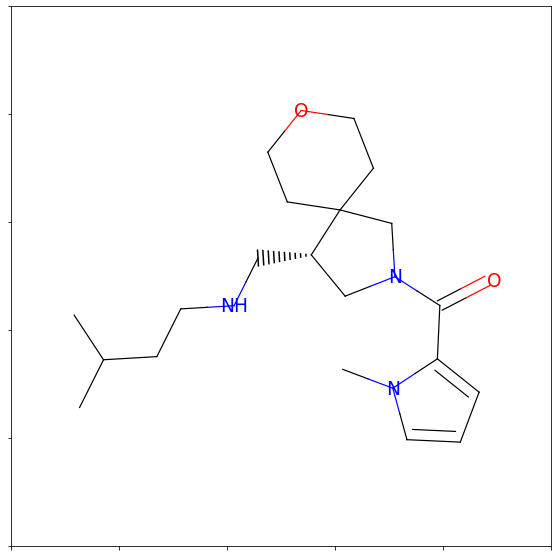

Invalid reconstruction!


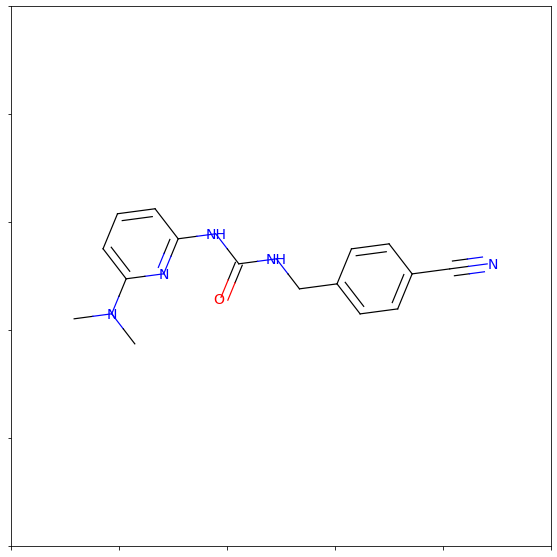

Invalid reconstruction!


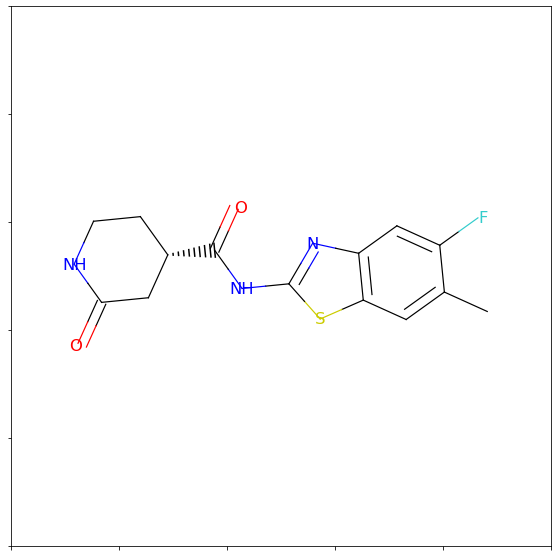

Invalid reconstruction!


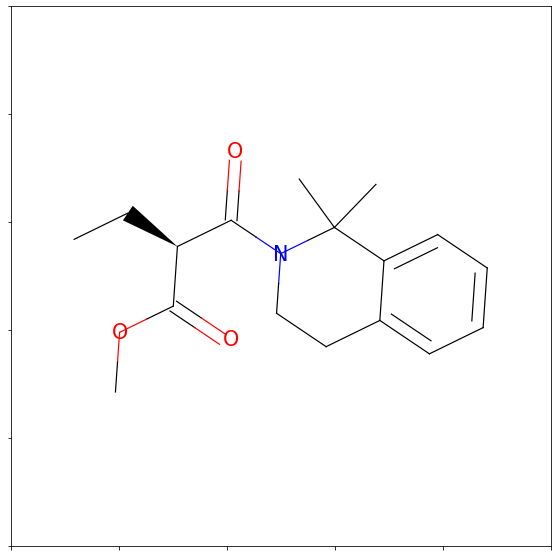

Invalid reconstruction!


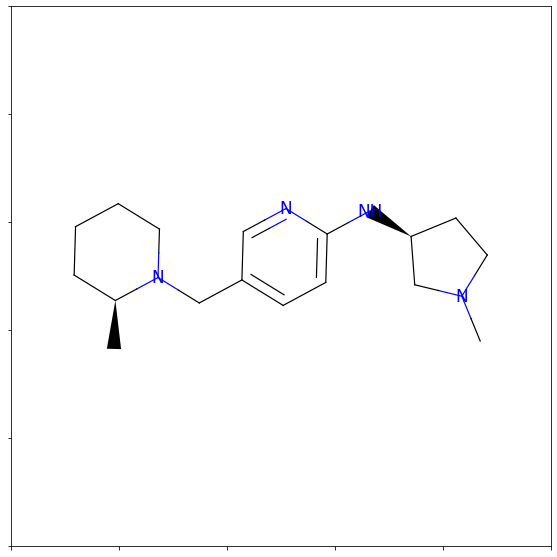

Invalid reconstruction!


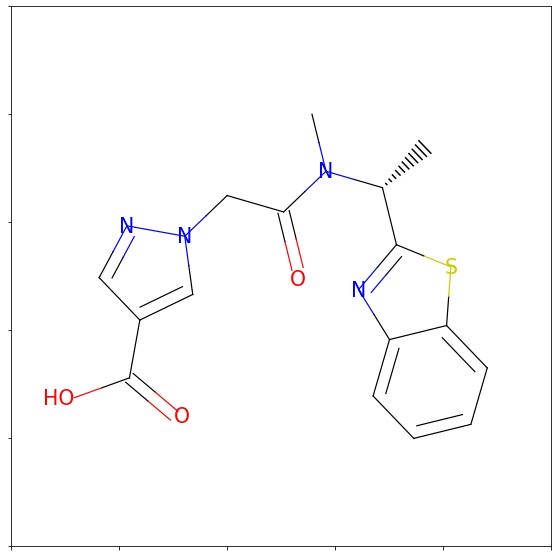

Invalid reconstruction!


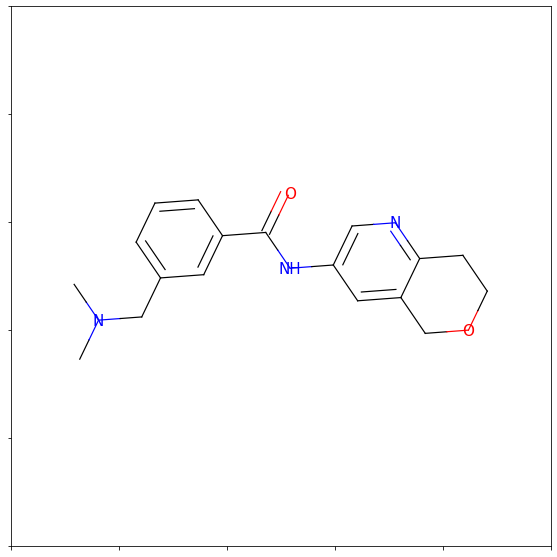

Invalid reconstruction!


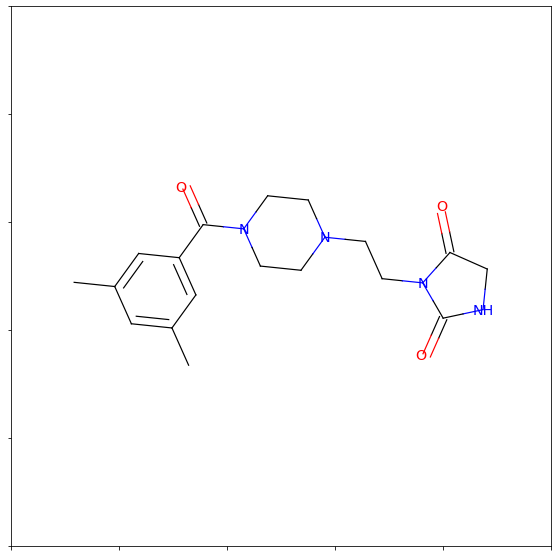

Invalid reconstruction!


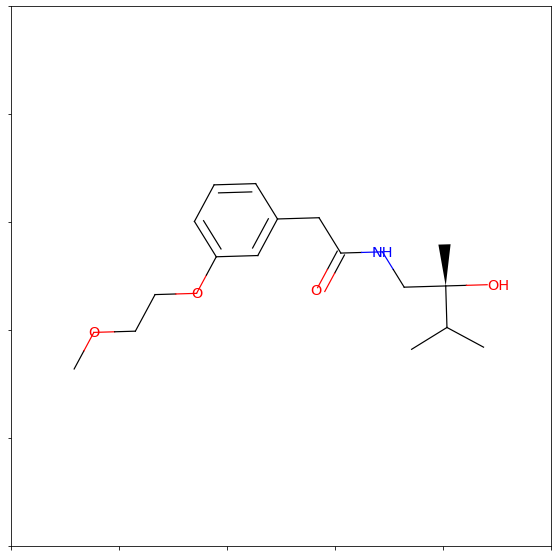

Invalid reconstruction!


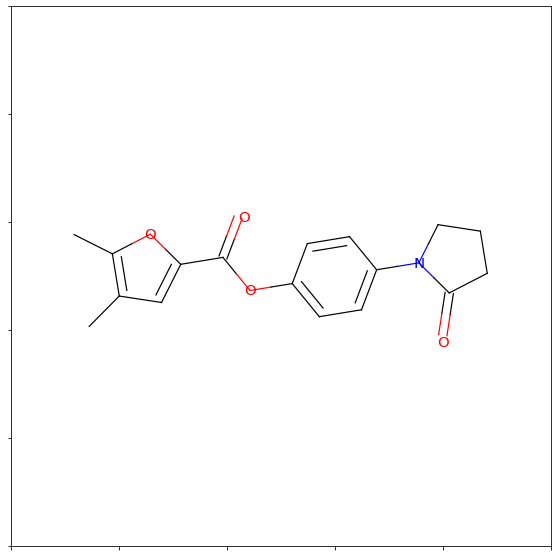

Invalid reconstruction!


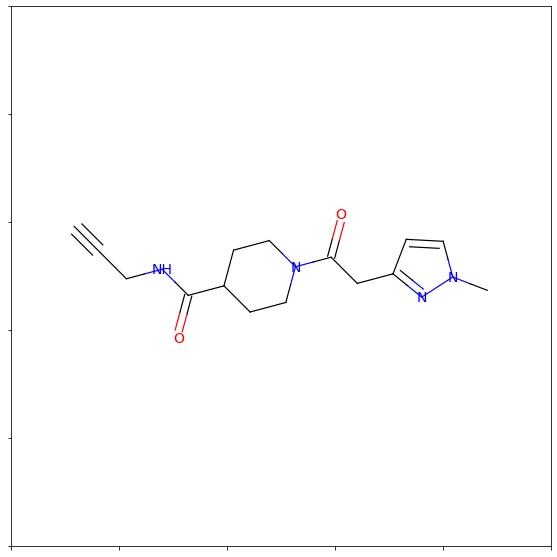

Invalid reconstruction!


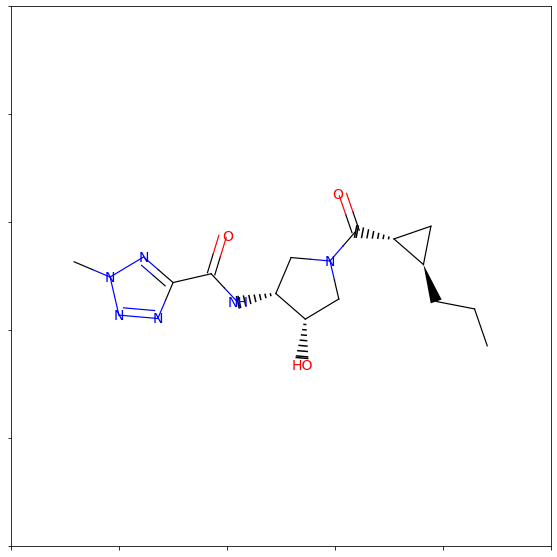

Invalid reconstruction!


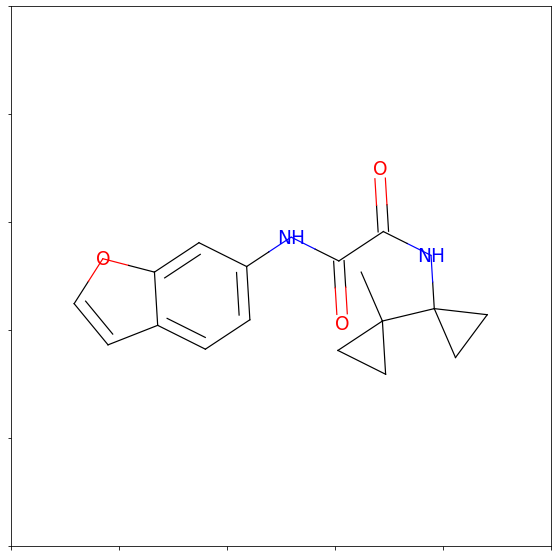

Invalid reconstruction!


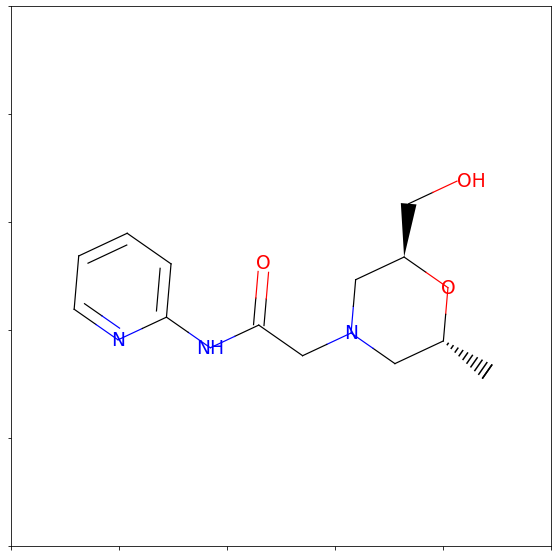

Invalid reconstruction!


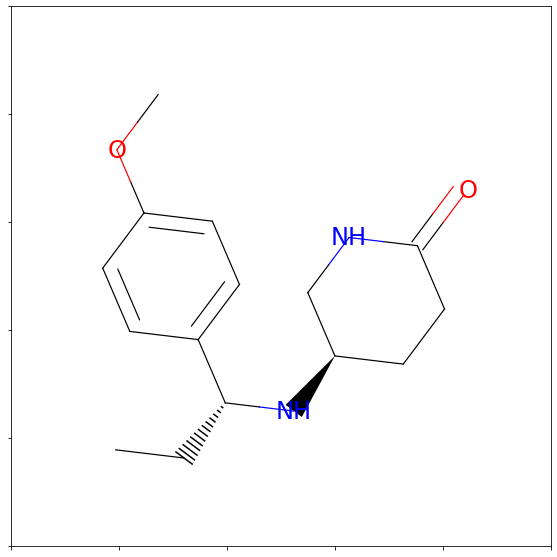

Invalid reconstruction!


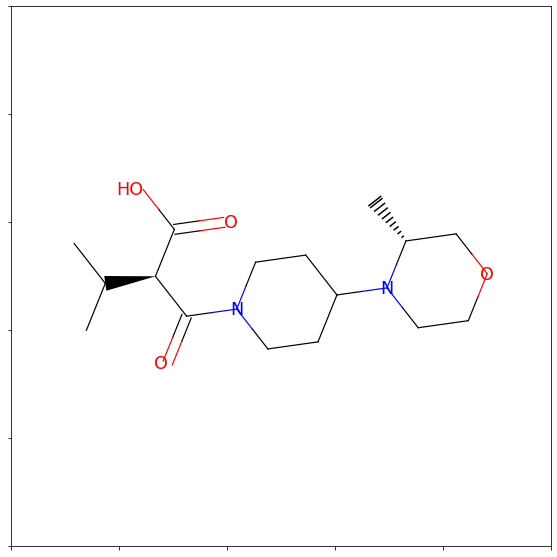

Invalid reconstruction!


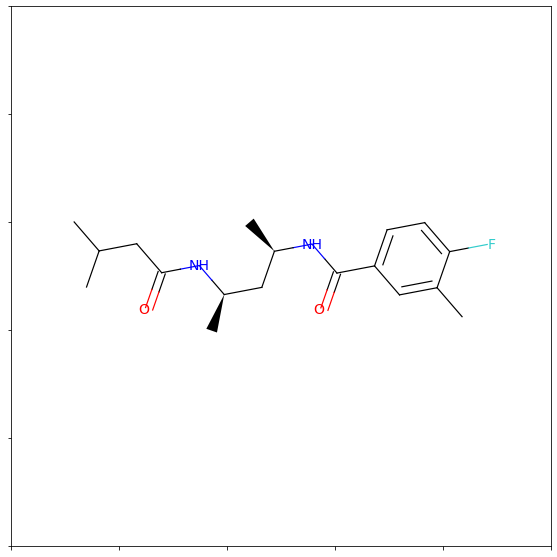

Invalid reconstruction!


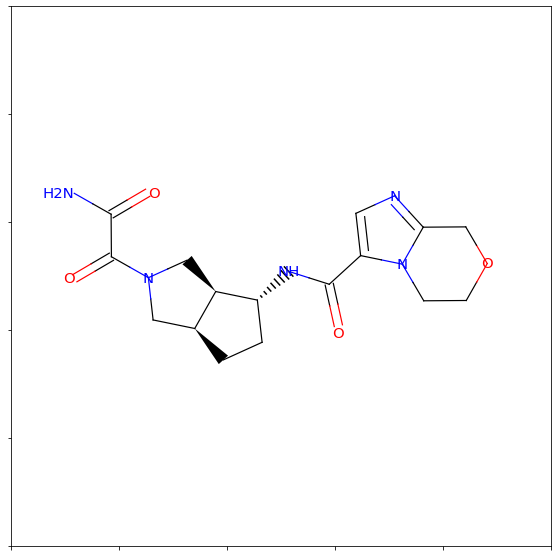

Invalid reconstruction!


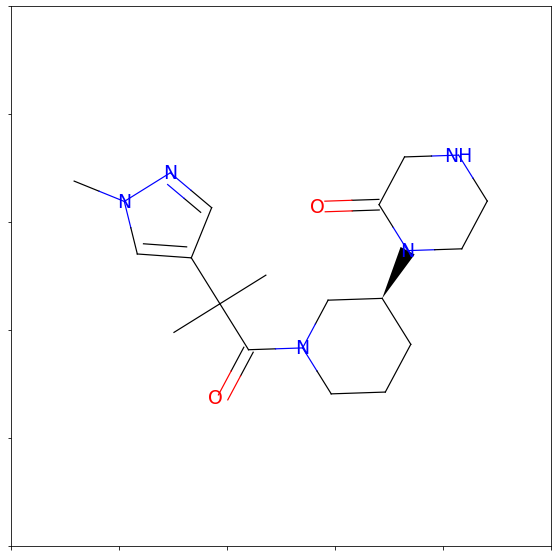

Invalid reconstruction!


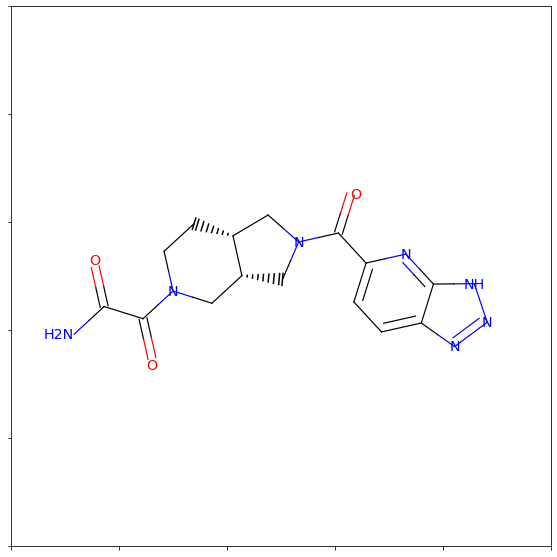

Invalid reconstruction!


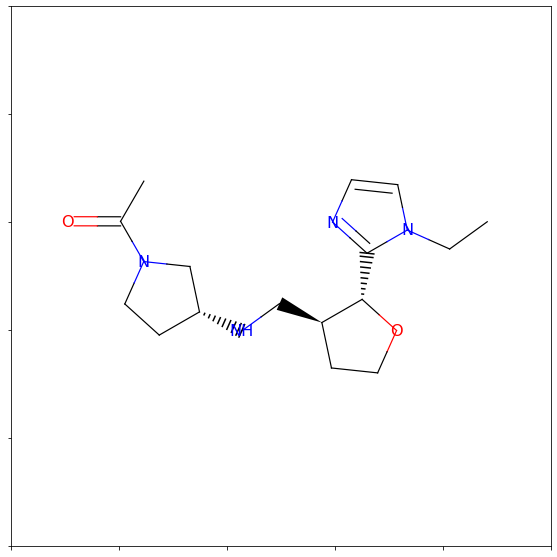

Invalid reconstruction!


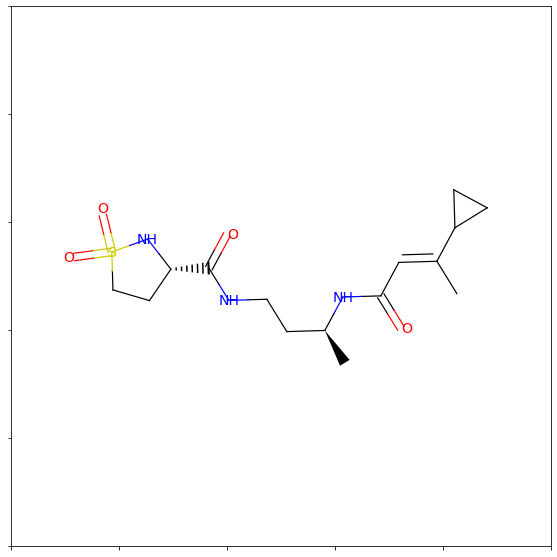

Invalid reconstruction!


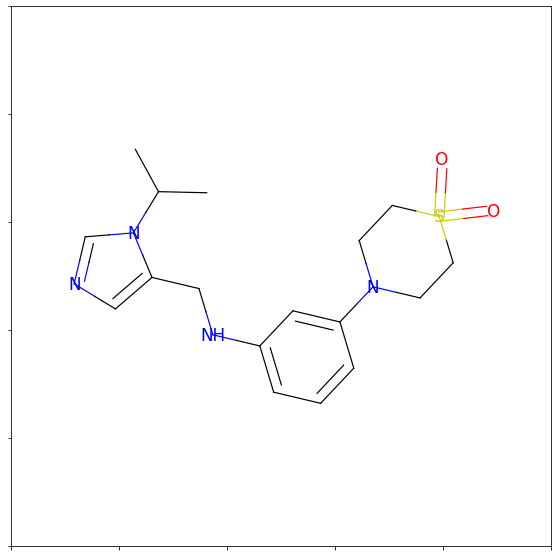

Invalid reconstruction!


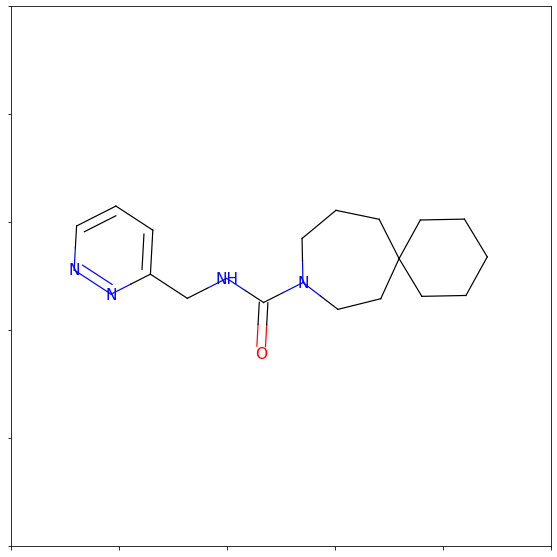

Invalid reconstruction!


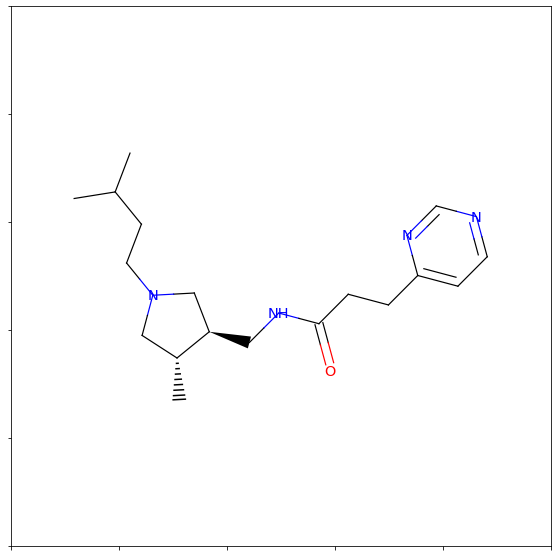

Invalid reconstruction!


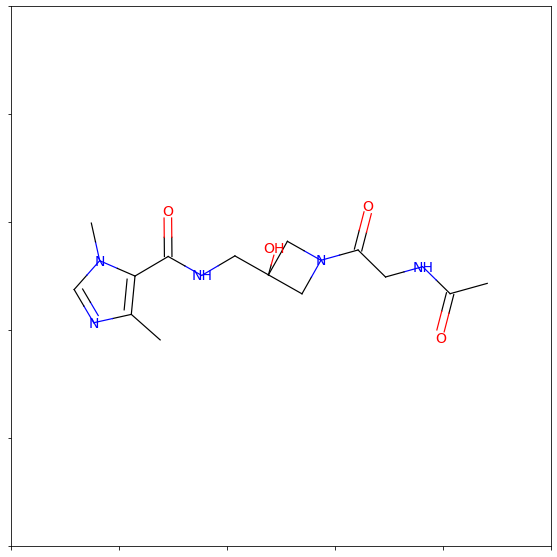

Invalid reconstruction!


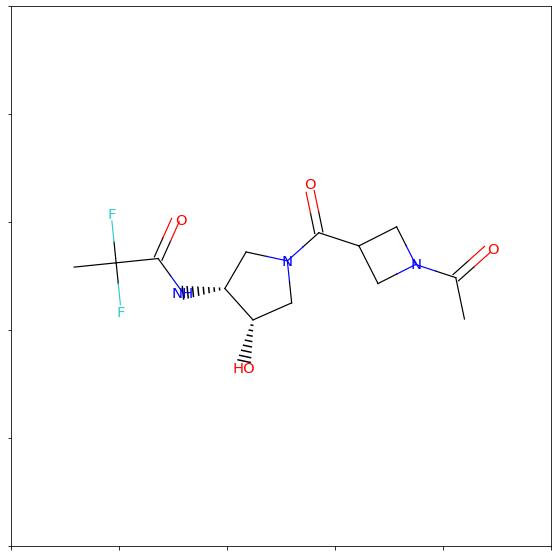

Invalid reconstruction!


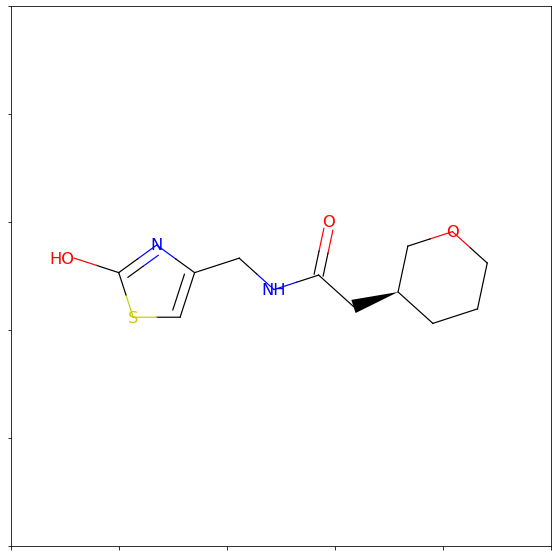

Invalid reconstruction!


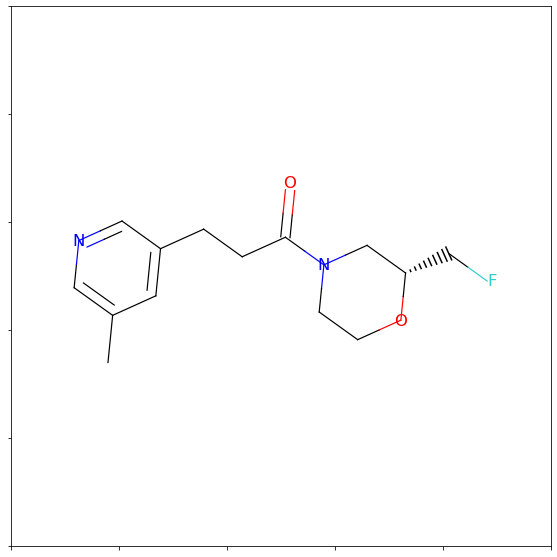

Invalid reconstruction!


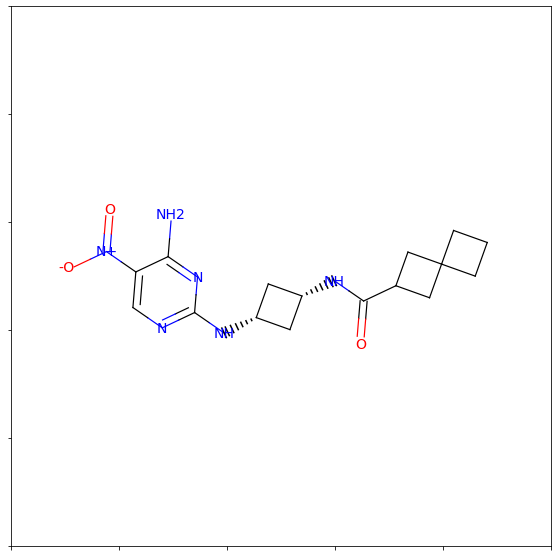

Invalid reconstruction!


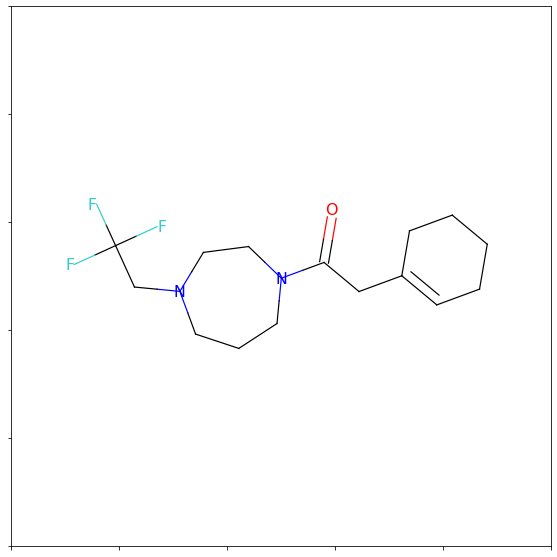

Invalid reconstruction!


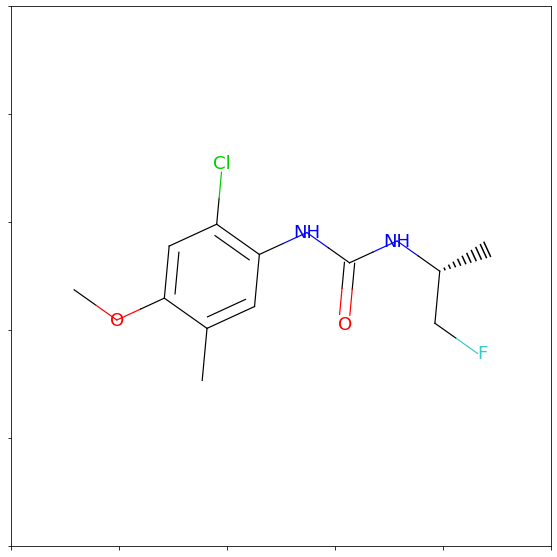

Invalid reconstruction!


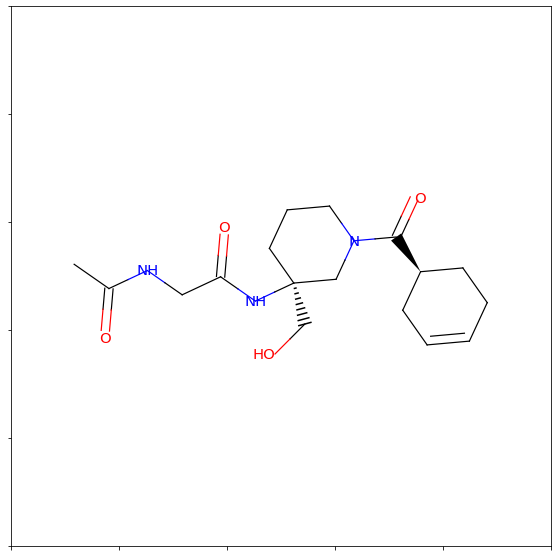

Invalid reconstruction!


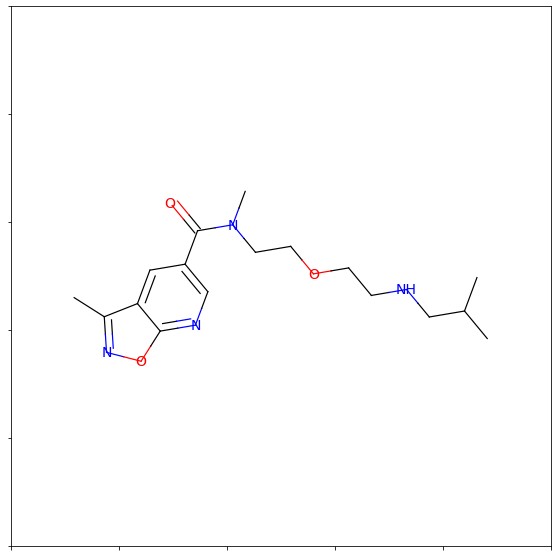

Invalid reconstruction!


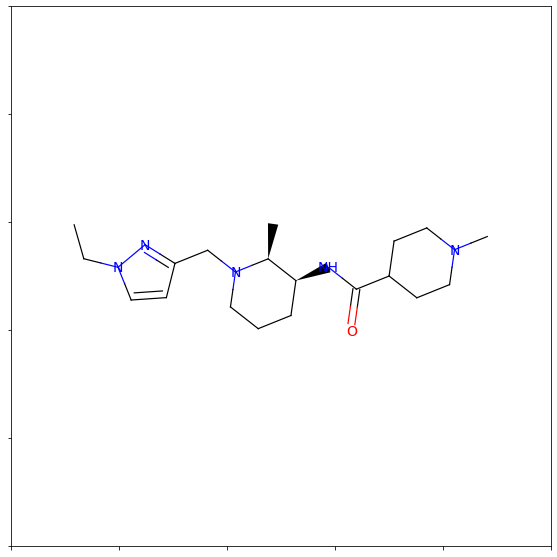

Invalid reconstruction!


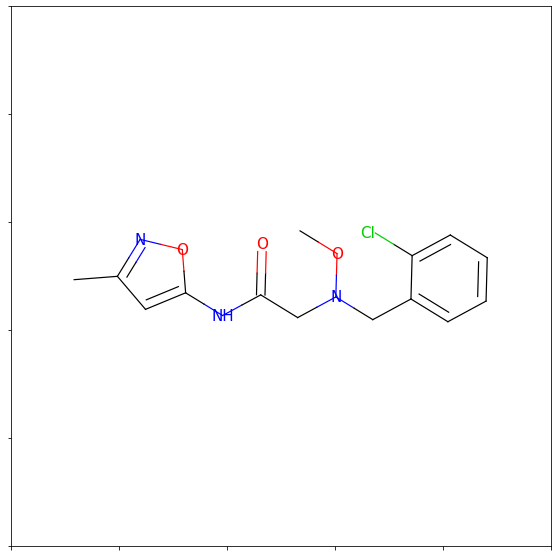

Invalid reconstruction!


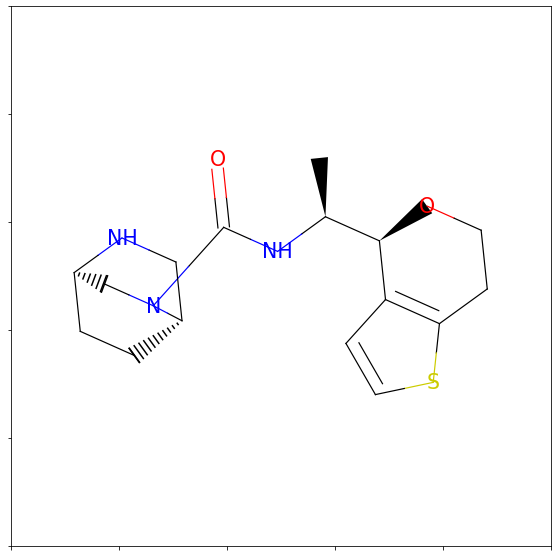

Invalid reconstruction!


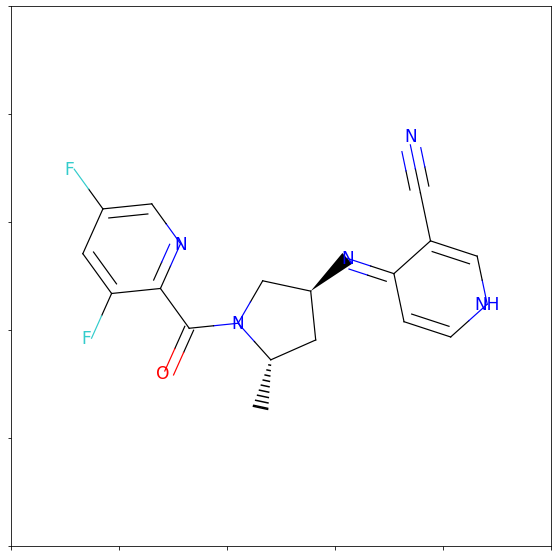

Invalid reconstruction!


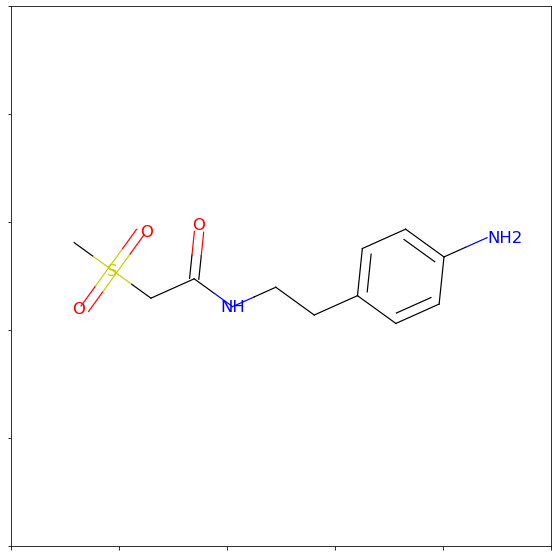

Invalid reconstruction!


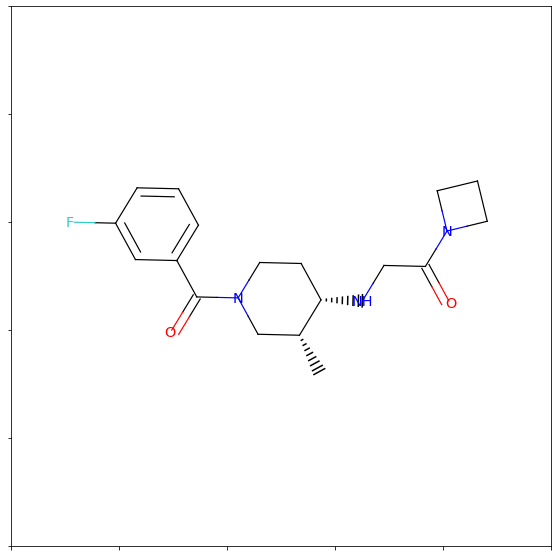

Invalid reconstruction!


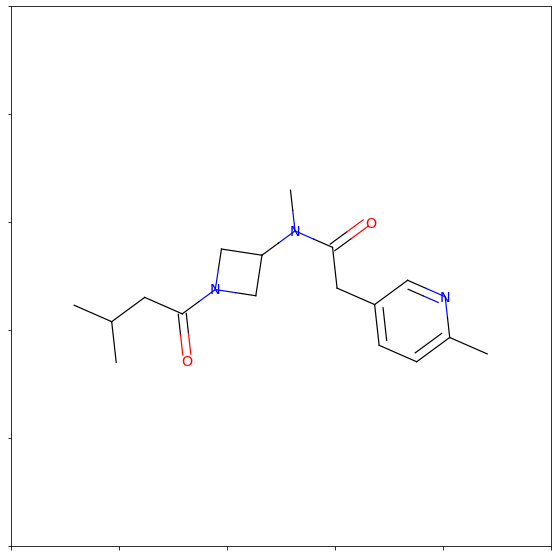

Invalid reconstruction!


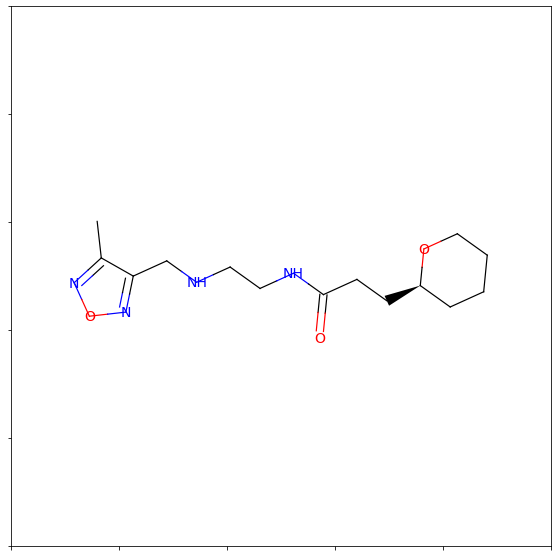

Invalid reconstruction!


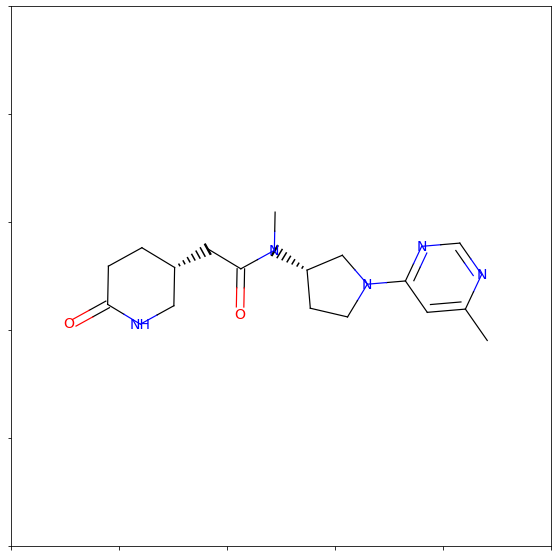

Invalid reconstruction!


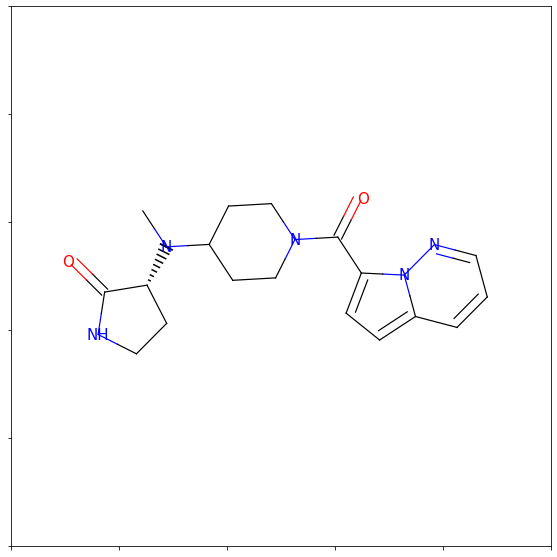

Invalid reconstruction!


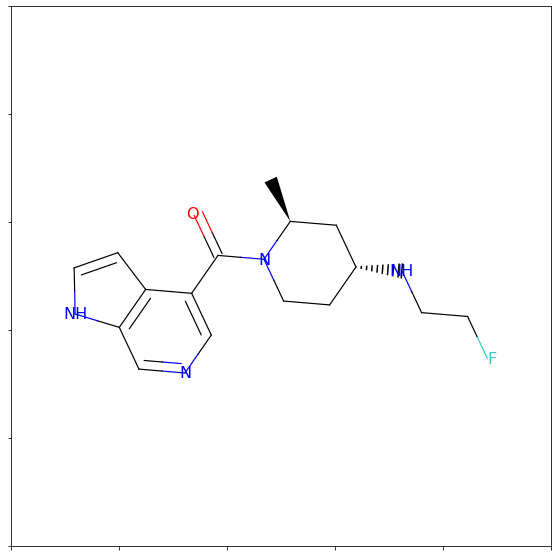

Invalid reconstruction!


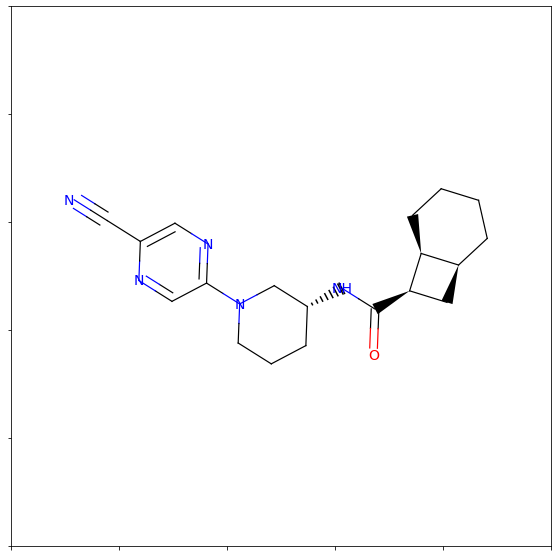

Invalid reconstruction!


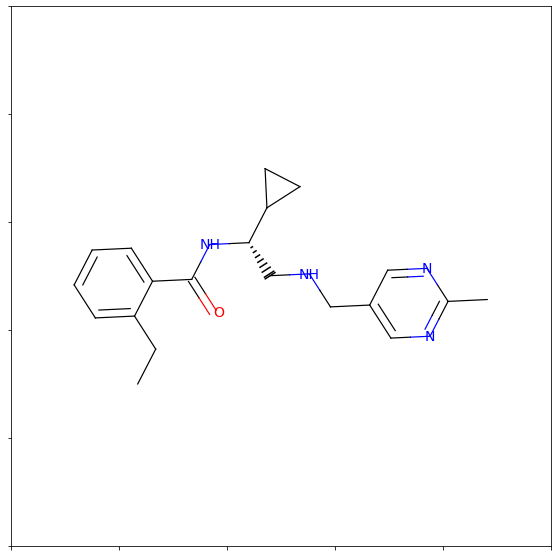

Invalid reconstruction!


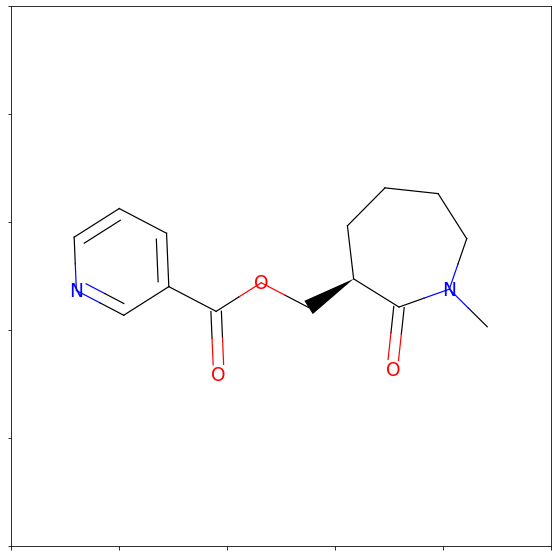

Invalid reconstruction!


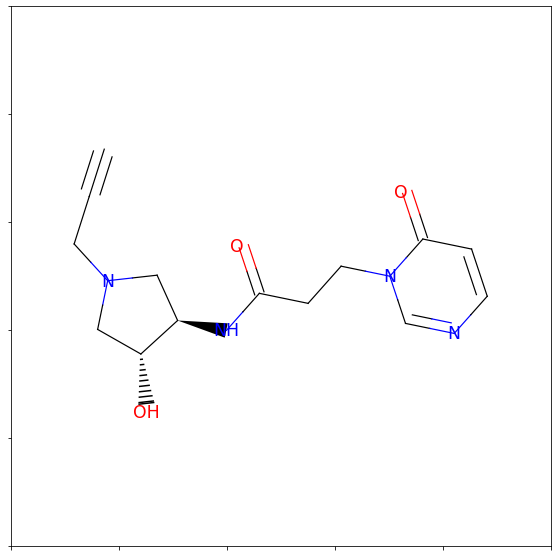

Invalid reconstruction!


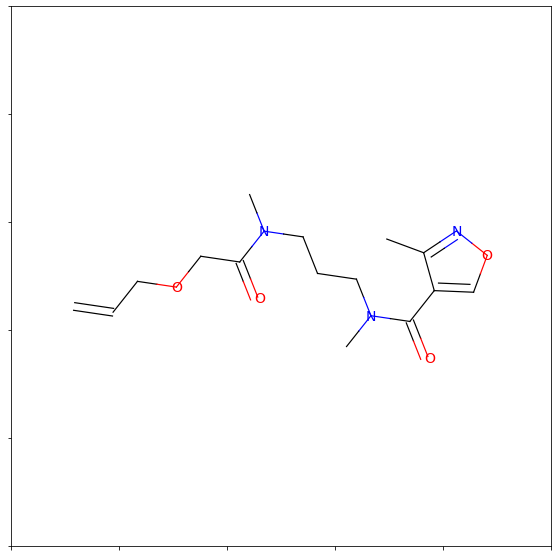

Invalid reconstruction!


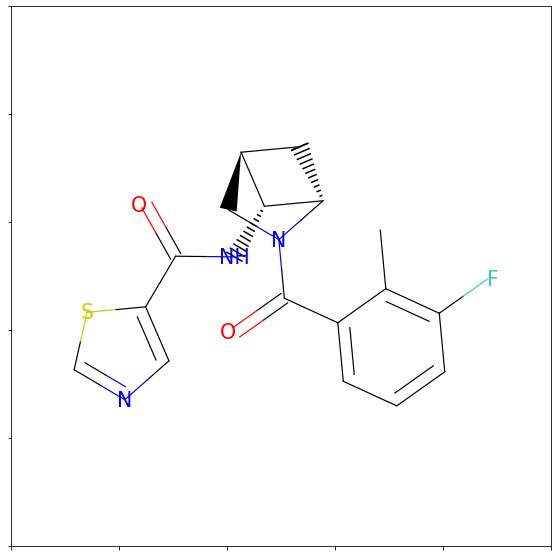

Invalid reconstruction!


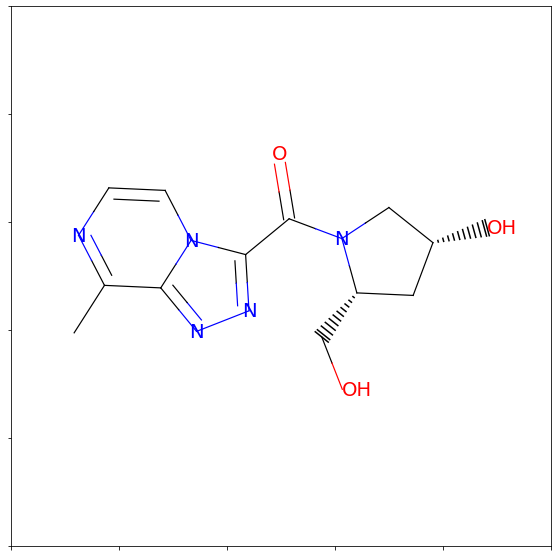

Invalid reconstruction!


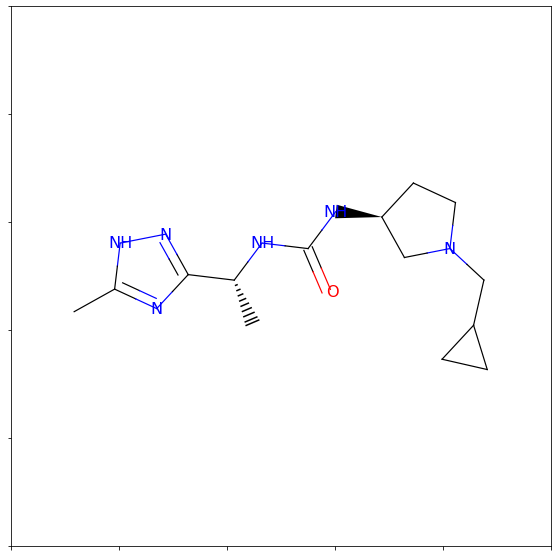

Invalid reconstruction!


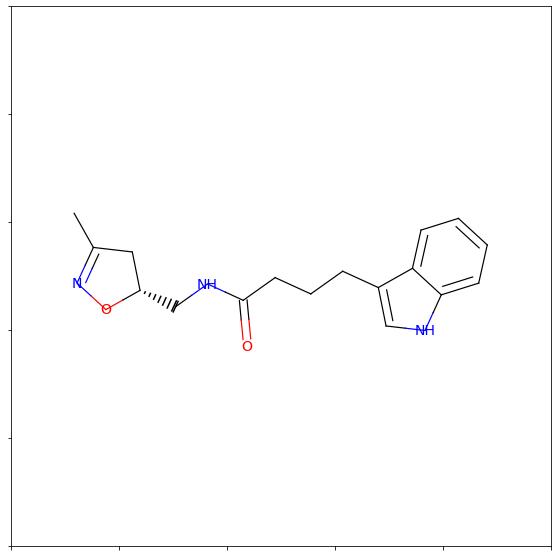

Invalid reconstruction!


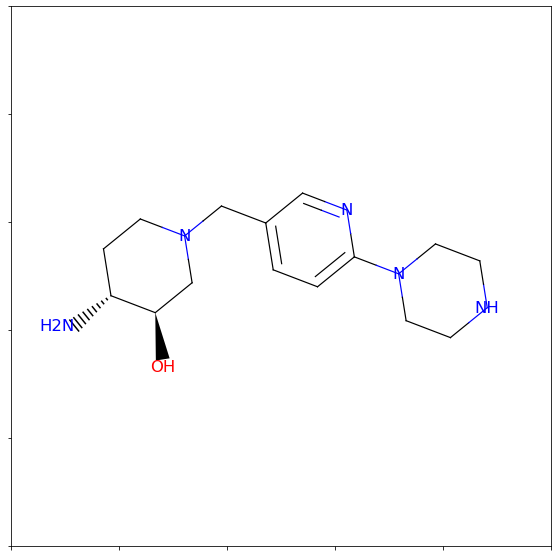

Invalid reconstruction!


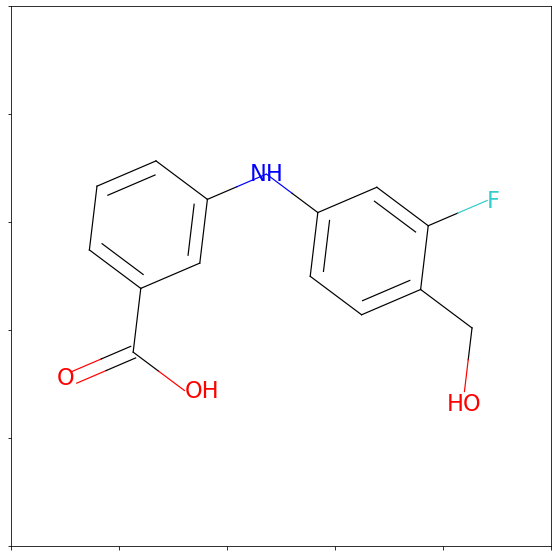

Invalid reconstruction!


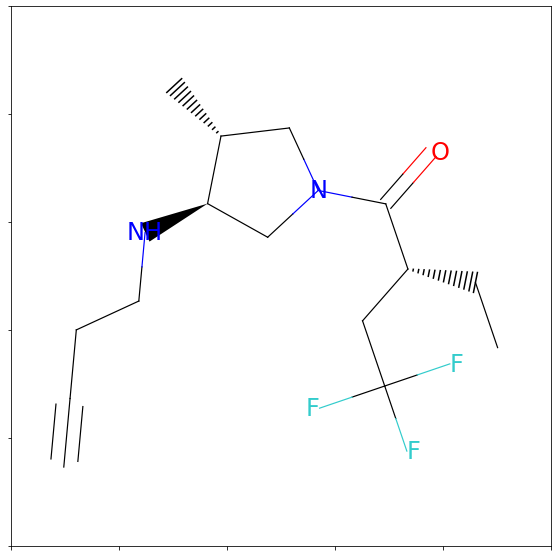

Invalid reconstruction!


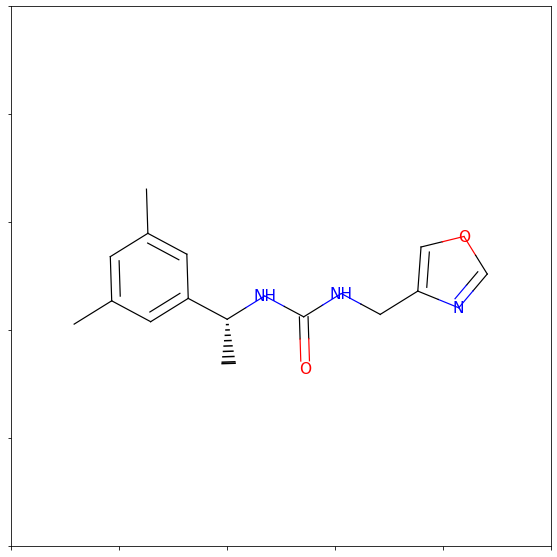

Invalid reconstruction!


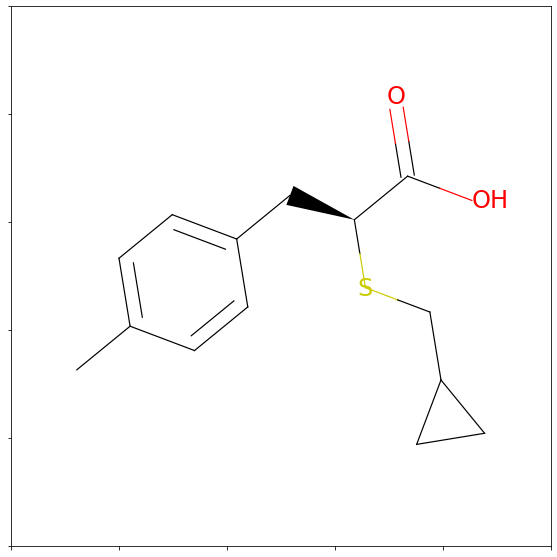

Invalid reconstruction!


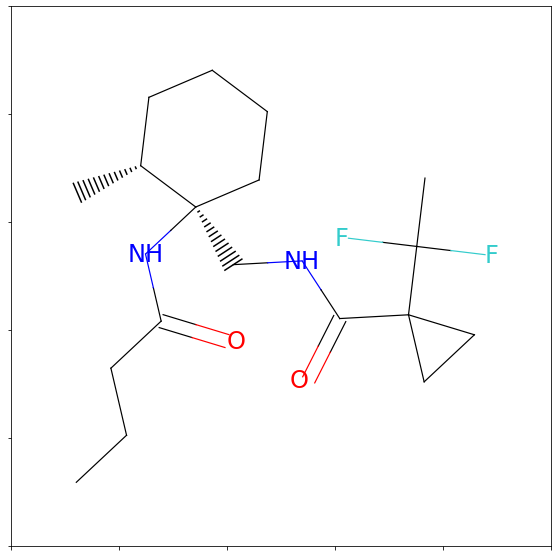

Invalid reconstruction!


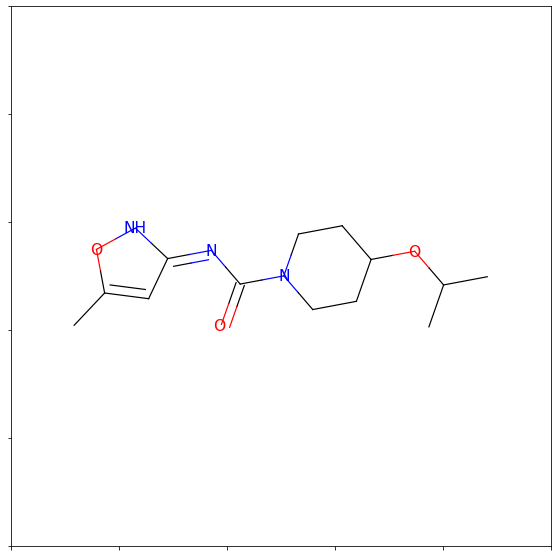

Invalid reconstruction!


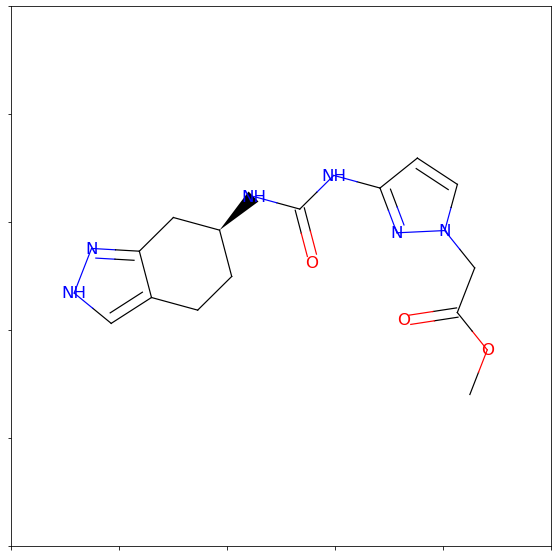

Invalid reconstruction!


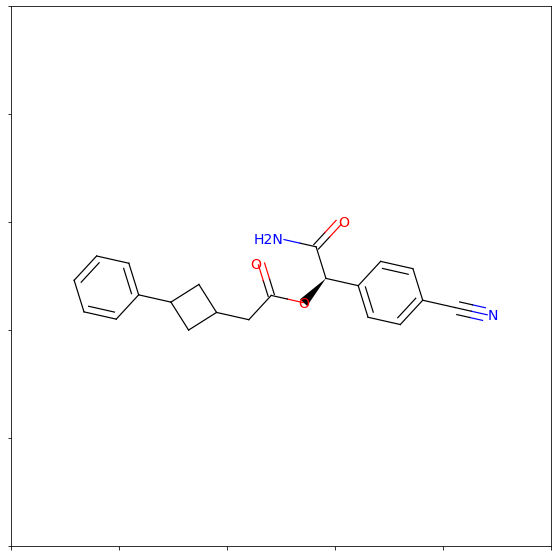

Invalid reconstruction!


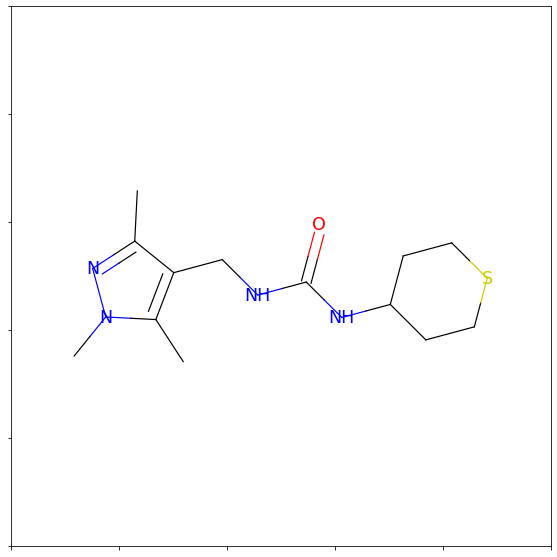

Invalid reconstruction!


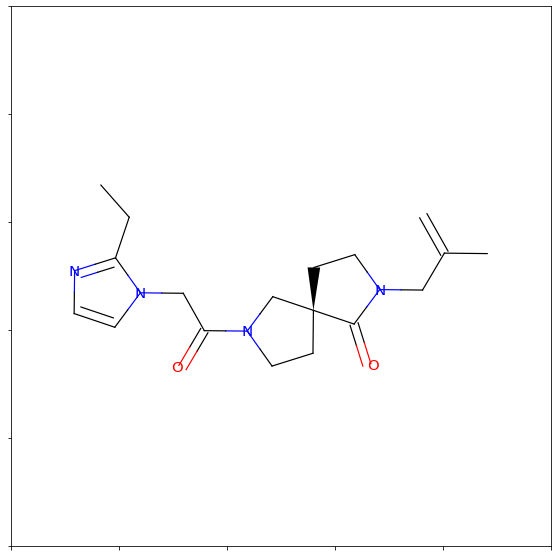

Invalid reconstruction!


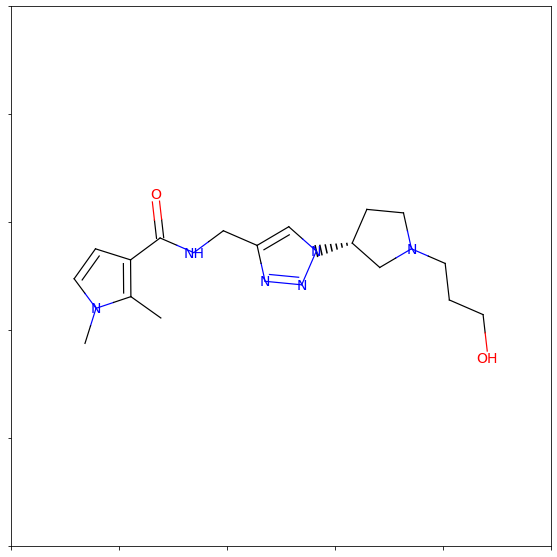

Invalid reconstruction!


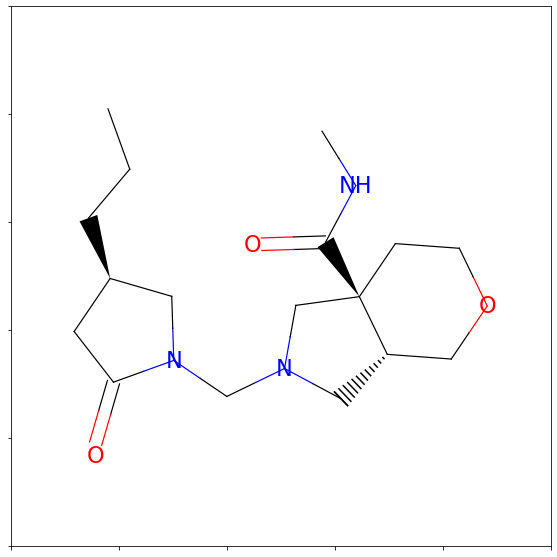

Invalid reconstruction!


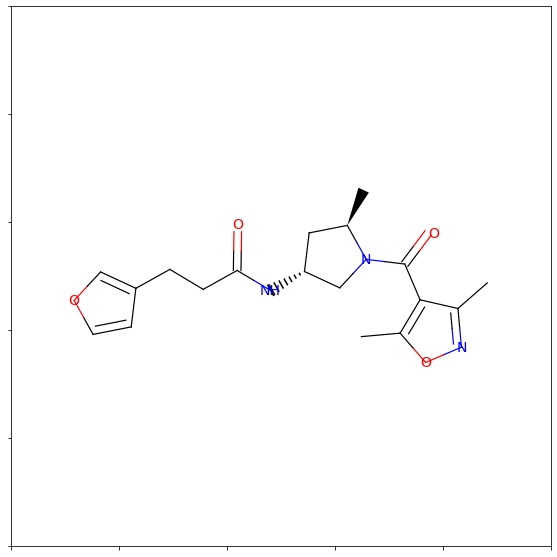

Invalid reconstruction!


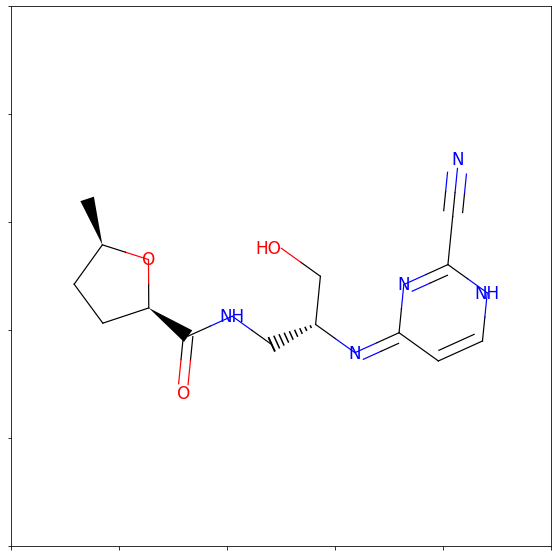

Invalid reconstruction!


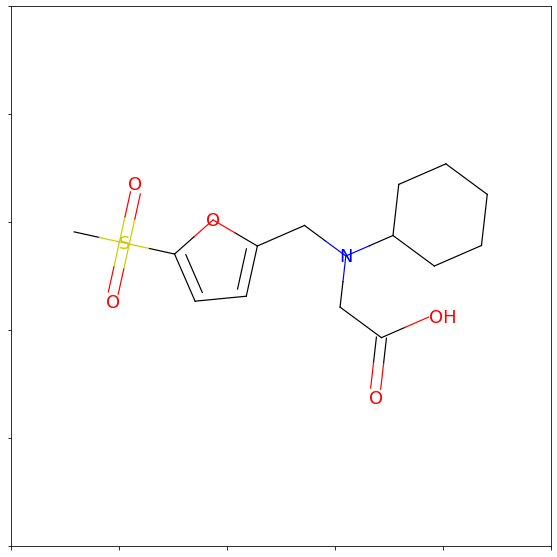

Invalid reconstruction!


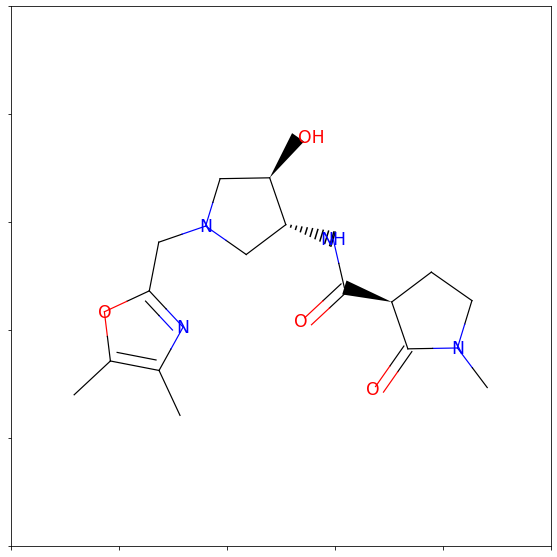

Invalid reconstruction!


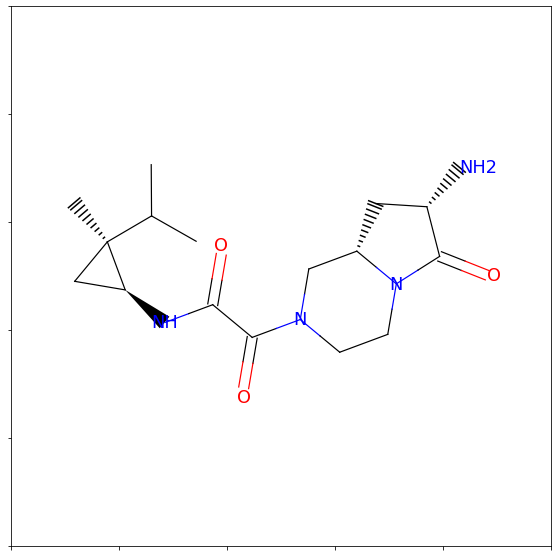

Invalid reconstruction!


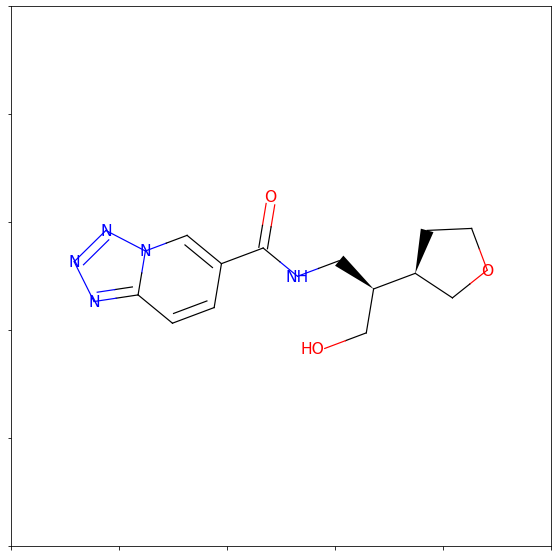

Invalid reconstruction!


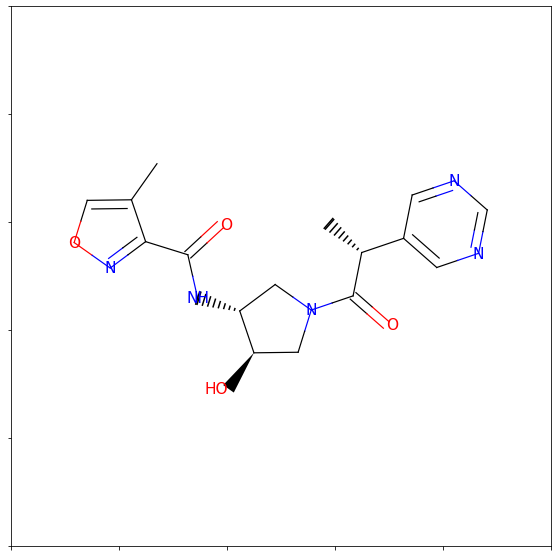

Invalid reconstruction!


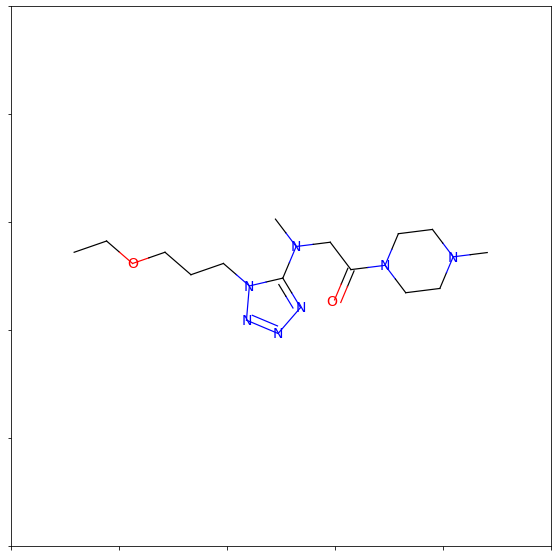

Invalid reconstruction!


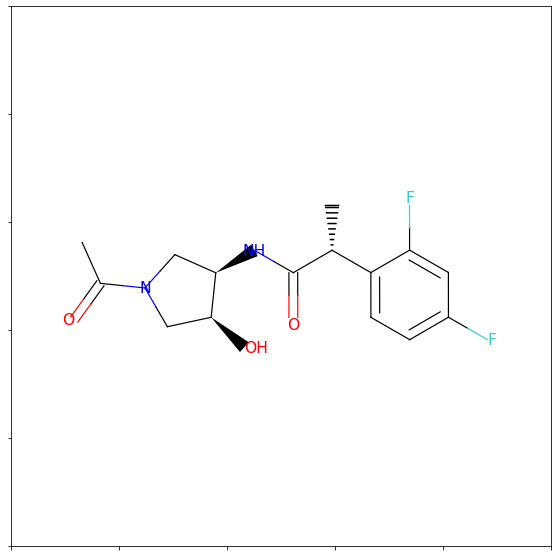

Invalid reconstruction!


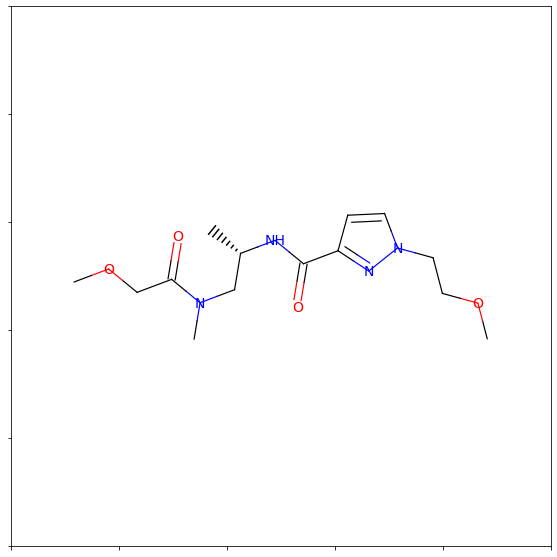

Invalid reconstruction!


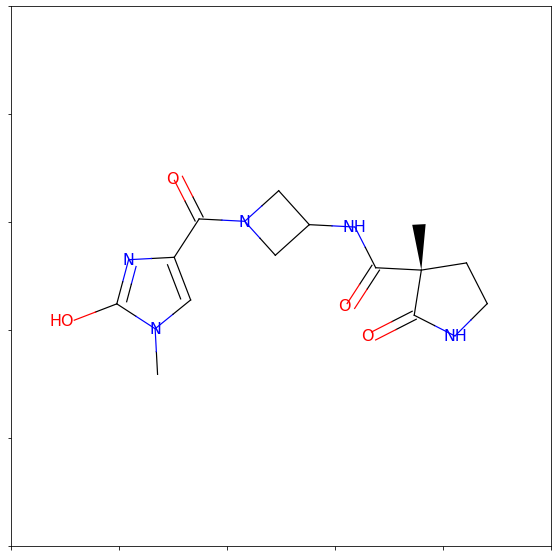

Invalid reconstruction!


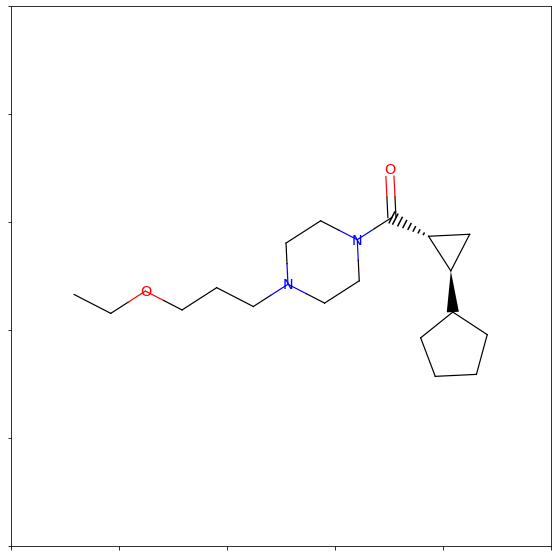

Invalid reconstruction!


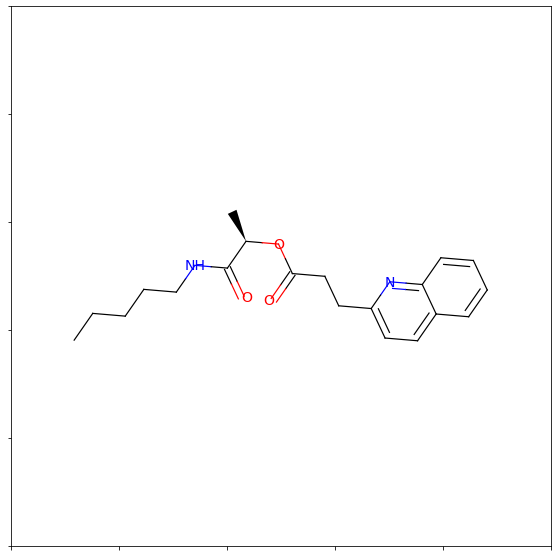

Invalid reconstruction!


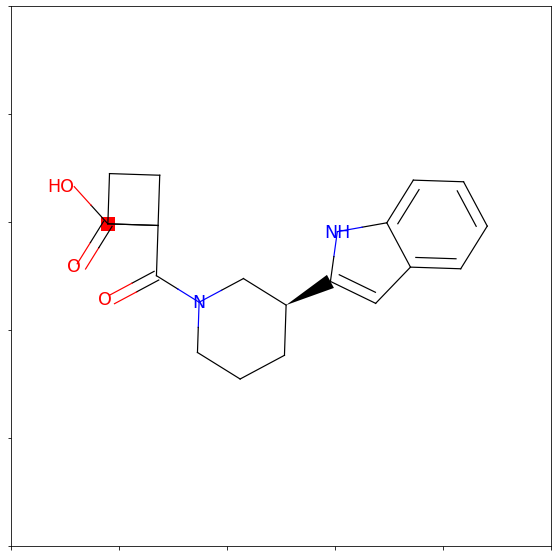

Invalid reconstruction!


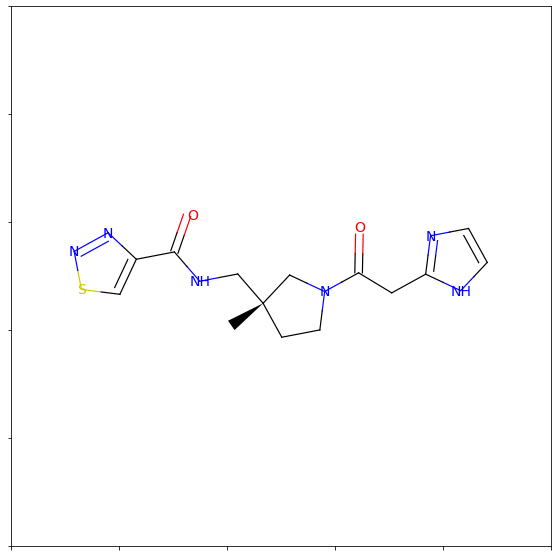

Invalid reconstruction!


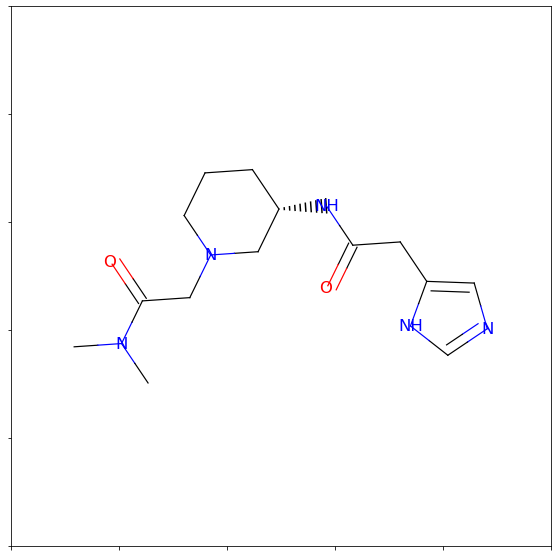

Invalid reconstruction!


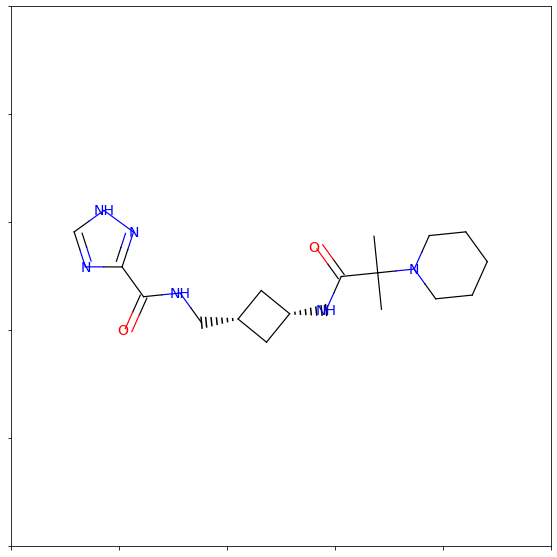

Invalid reconstruction!


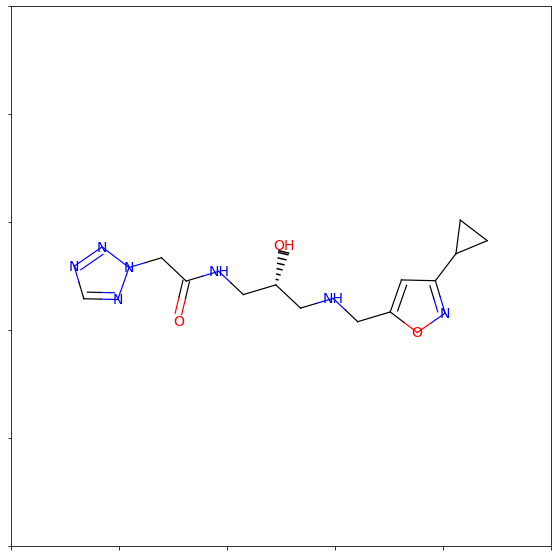

Invalid reconstruction!


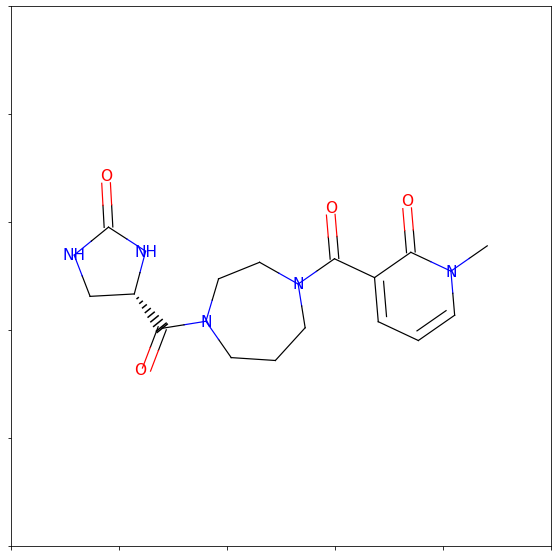

Invalid reconstruction!


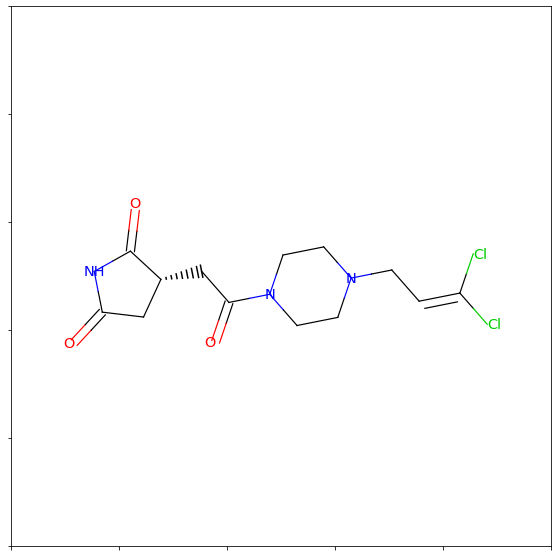

Invalid reconstruction!


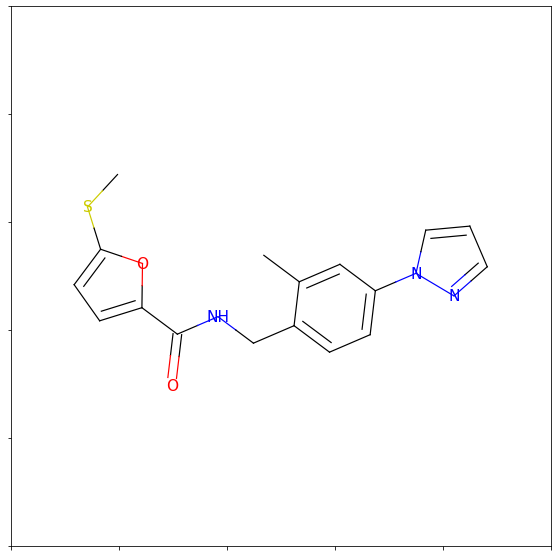

Invalid reconstruction!


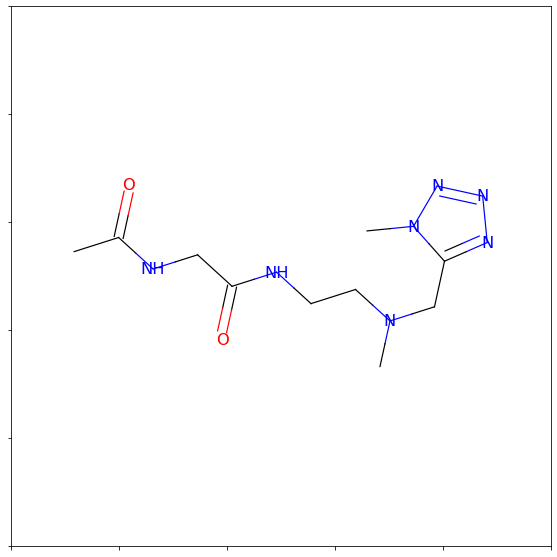

Invalid reconstruction!


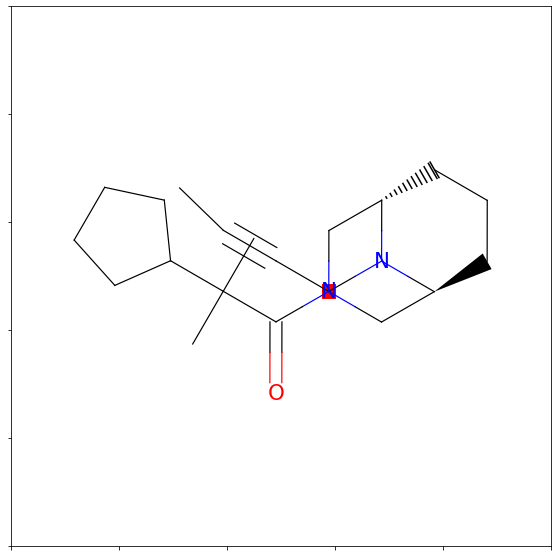

Invalid reconstruction!


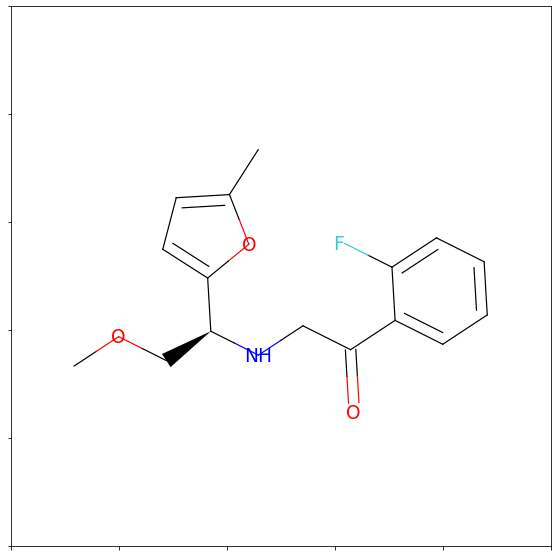

Invalid reconstruction!


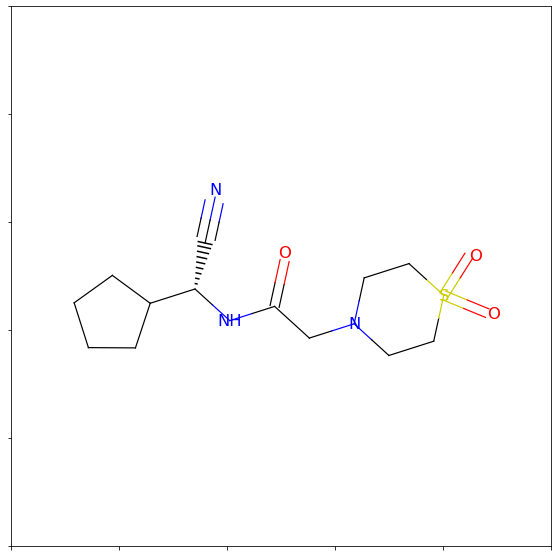

Invalid reconstruction!


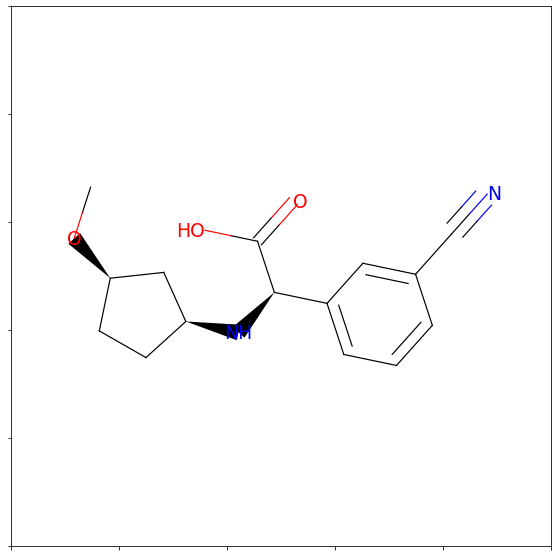

Invalid reconstruction!


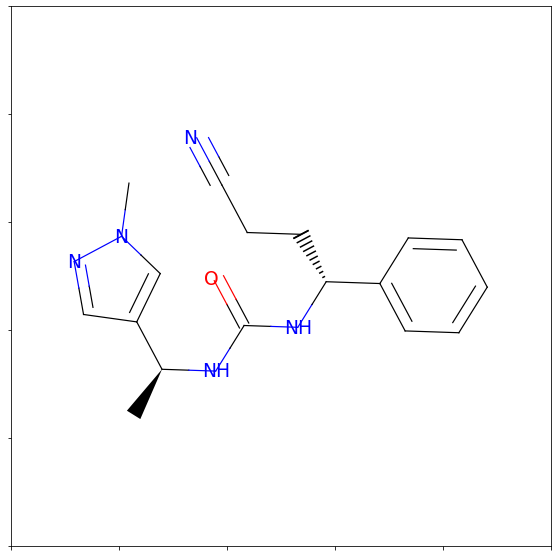

Invalid reconstruction!


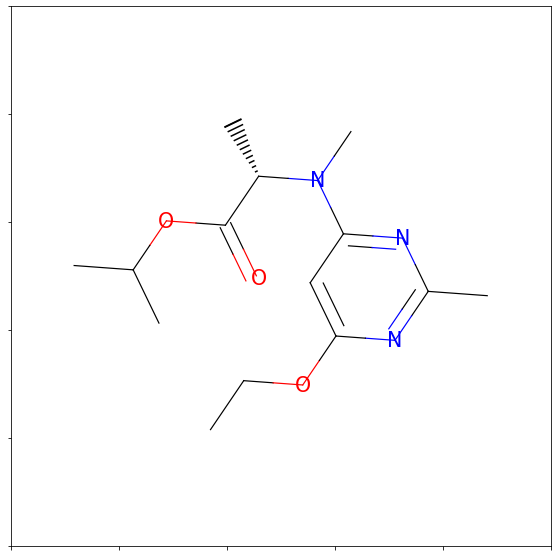

Invalid reconstruction!


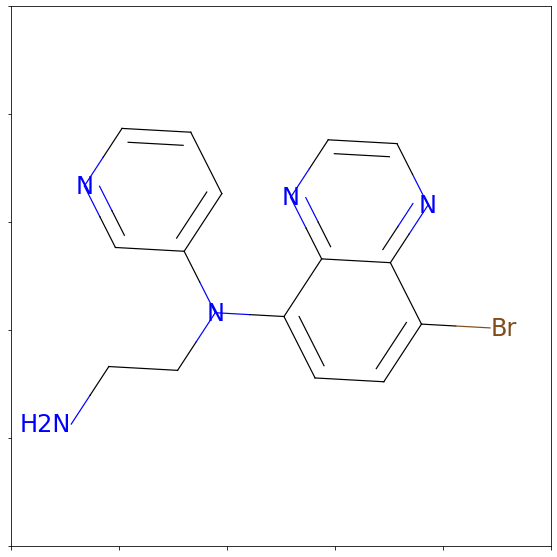

Invalid reconstruction!


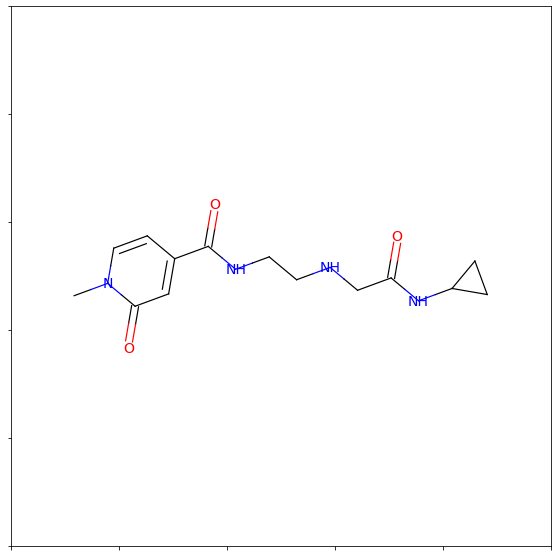

Invalid reconstruction!


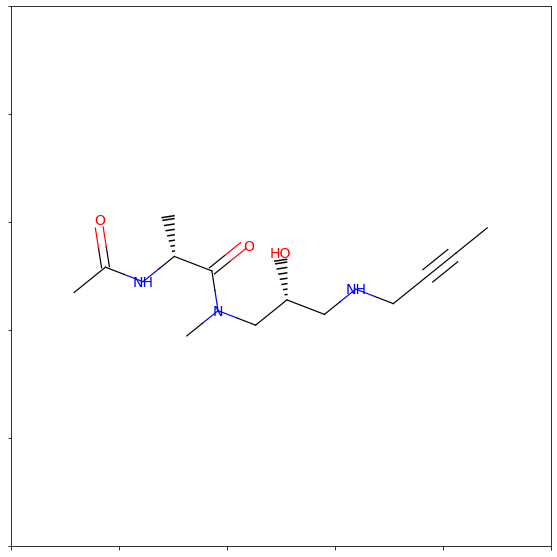

Invalid reconstruction!


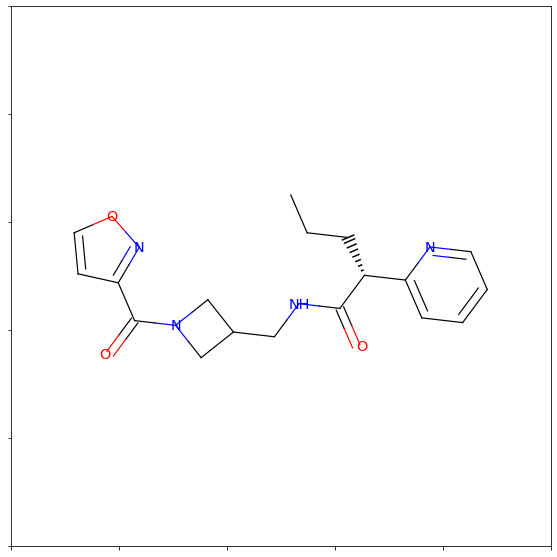

Invalid reconstruction!


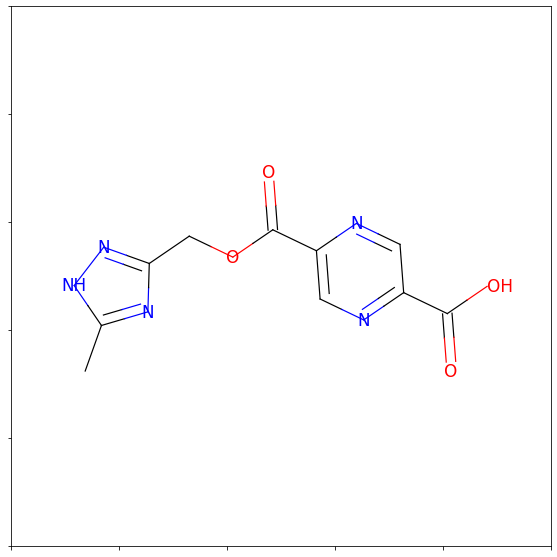

Invalid reconstruction!


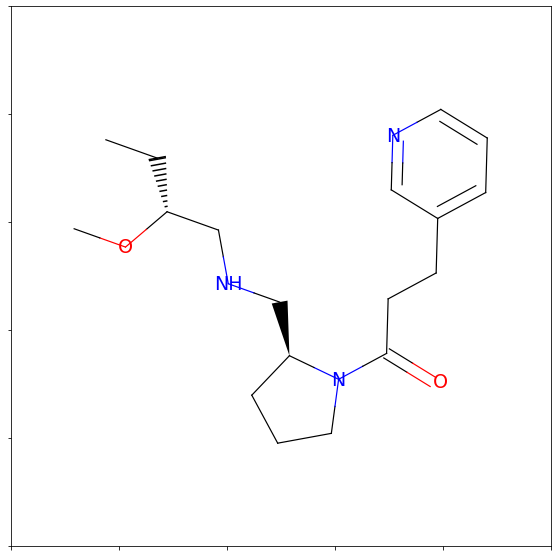

Invalid reconstruction!


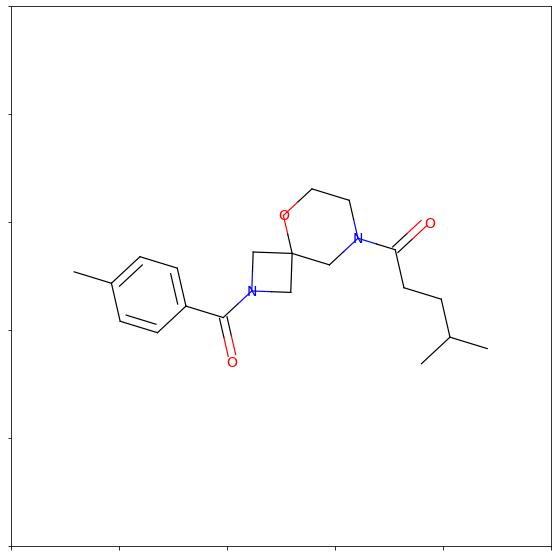

Invalid reconstruction!


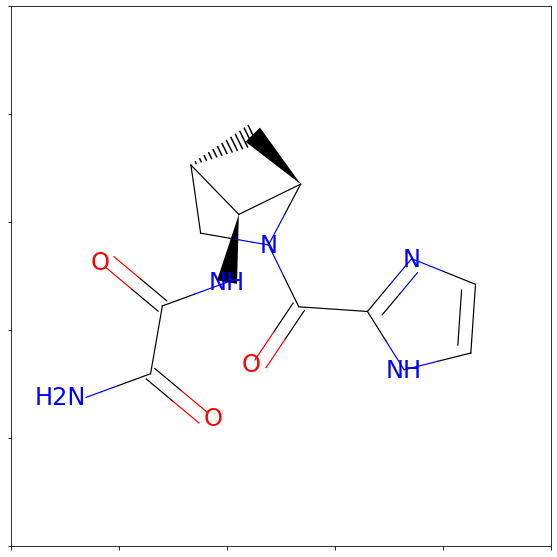

Invalid reconstruction!


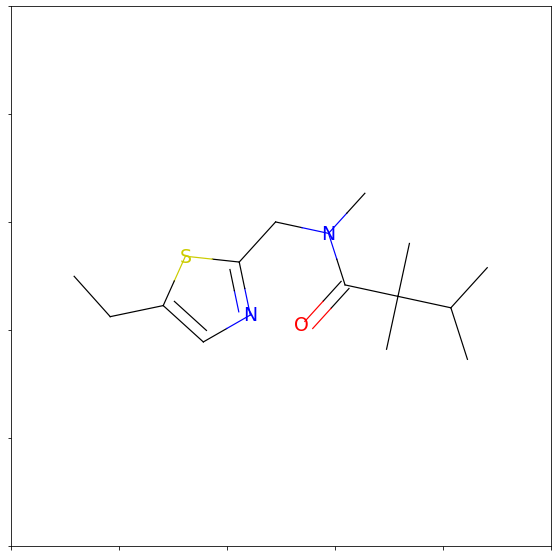

Invalid reconstruction!


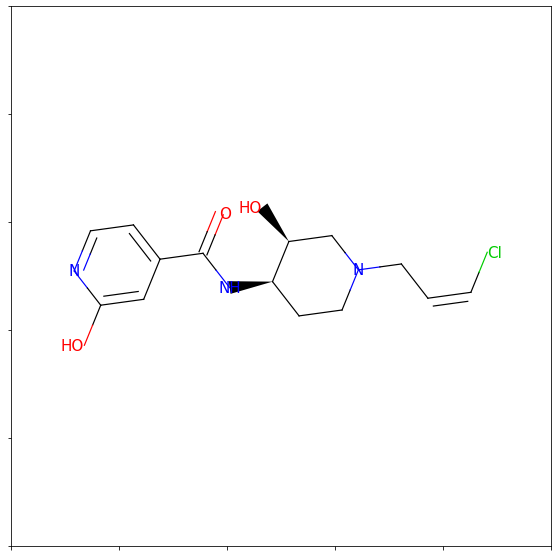

Invalid reconstruction!


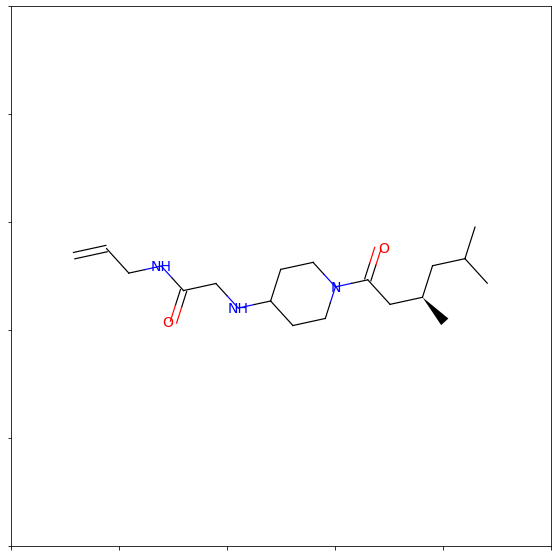

Invalid reconstruction!


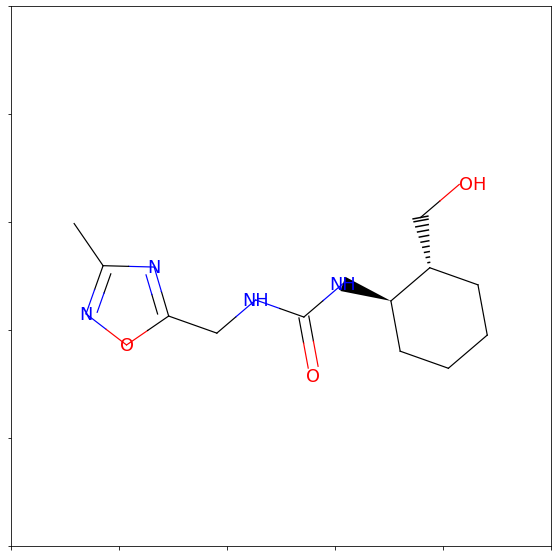

Invalid reconstruction!


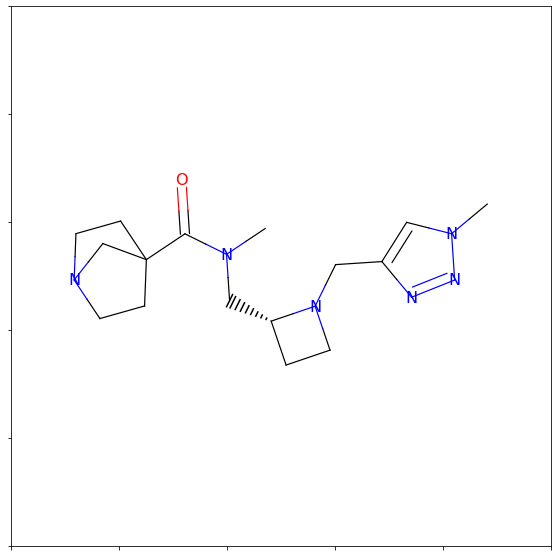

Invalid reconstruction!


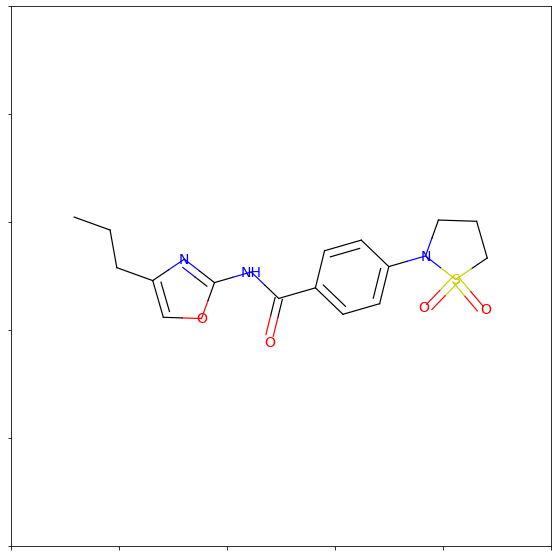

Invalid reconstruction!


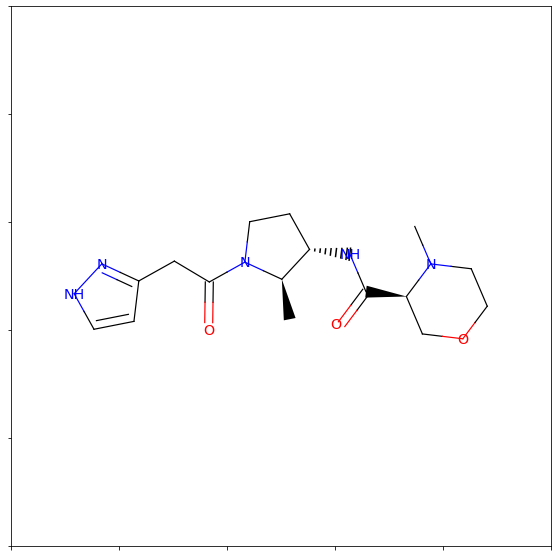

Invalid reconstruction!


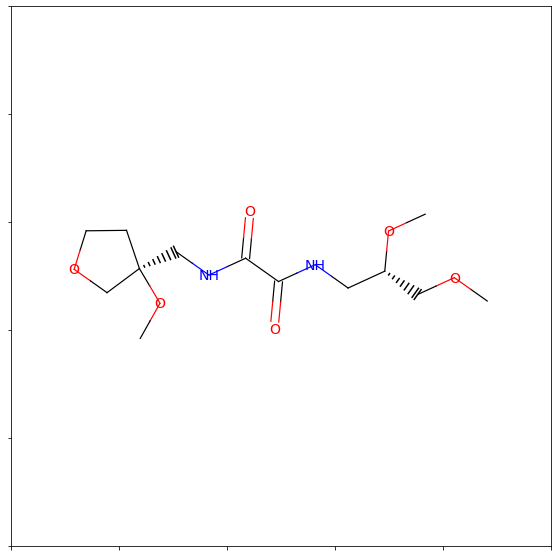

Invalid reconstruction!


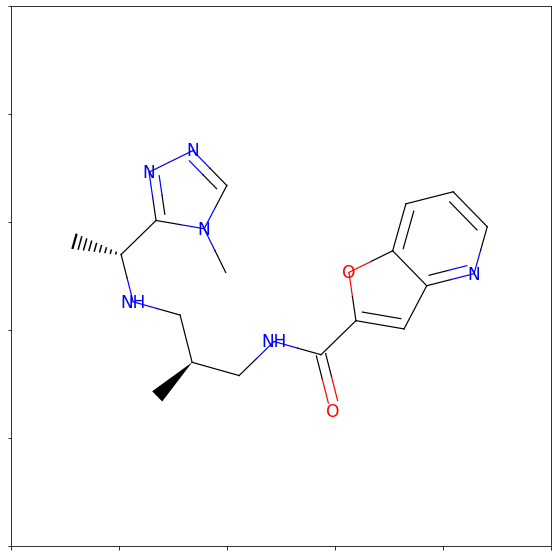

Invalid reconstruction!


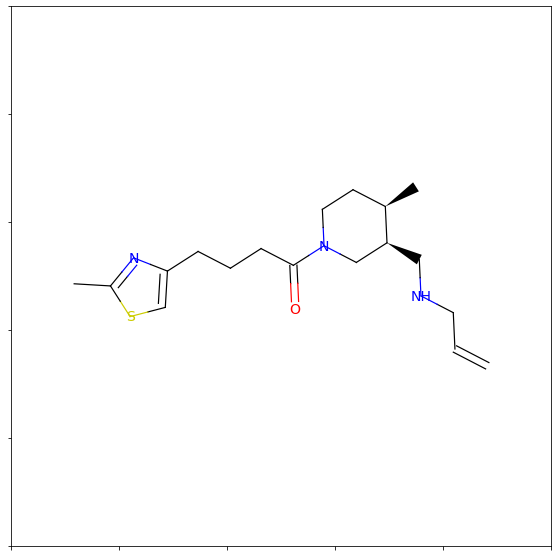

Invalid reconstruction!


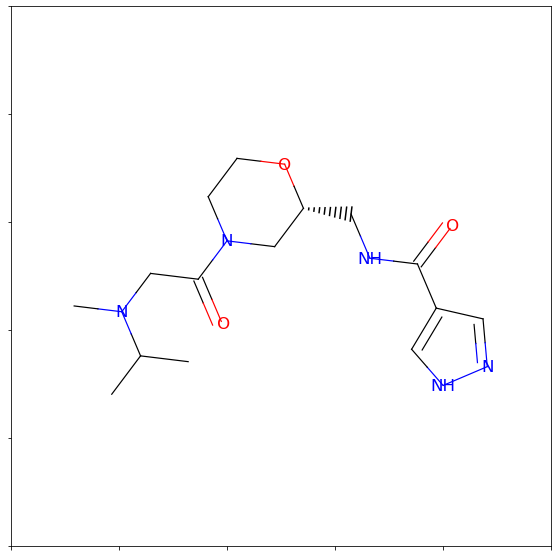

Invalid reconstruction!


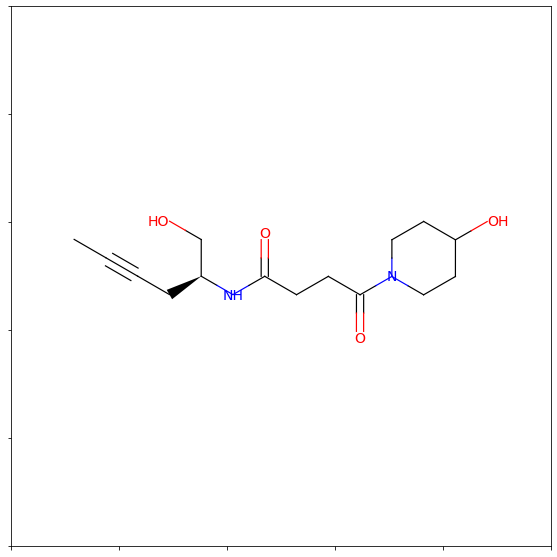

Invalid reconstruction!


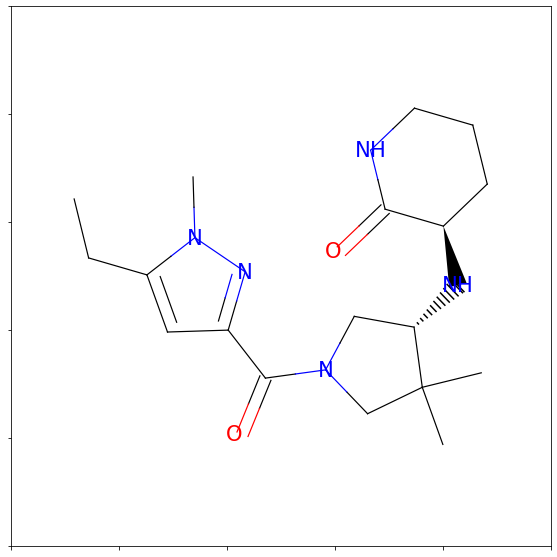

Invalid reconstruction!


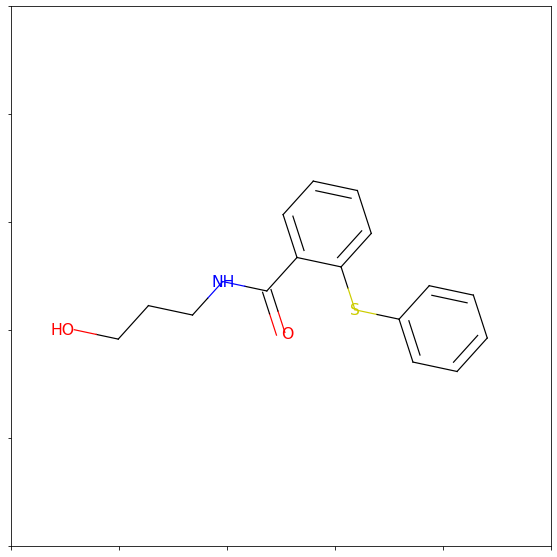

Invalid reconstruction!


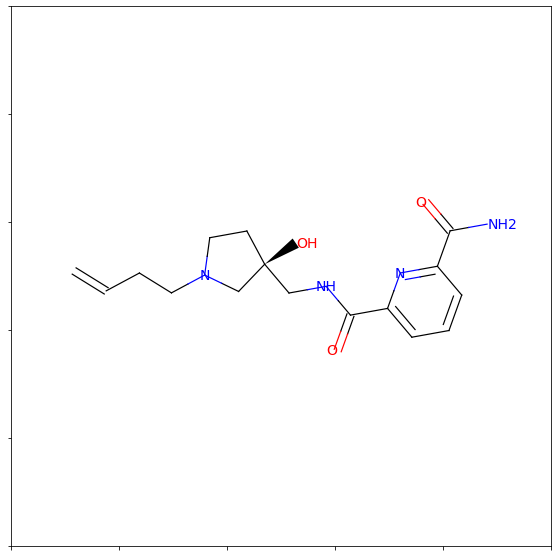

Invalid reconstruction!


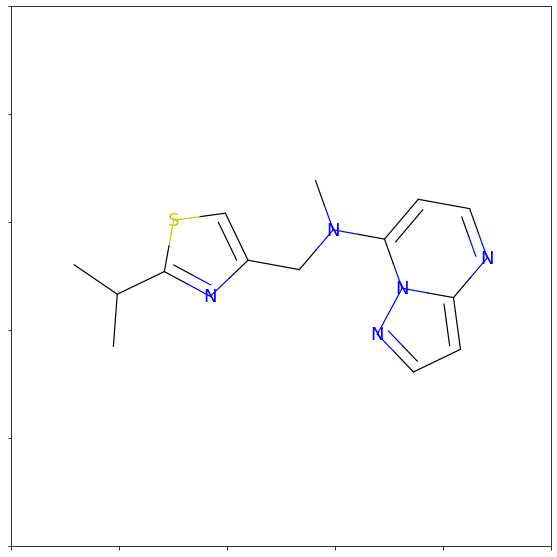

Invalid reconstruction!


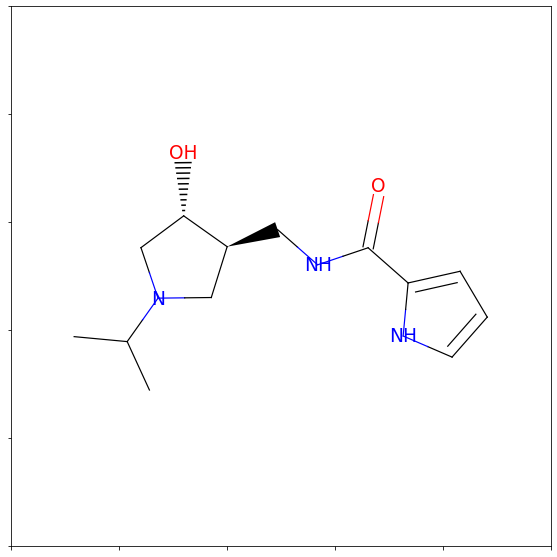

Invalid reconstruction!


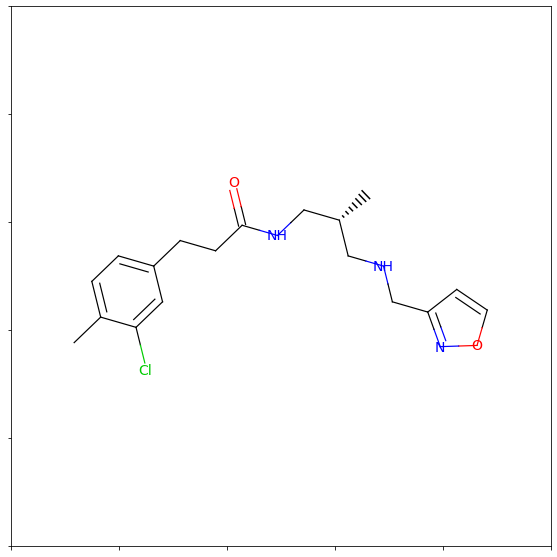

Invalid reconstruction!


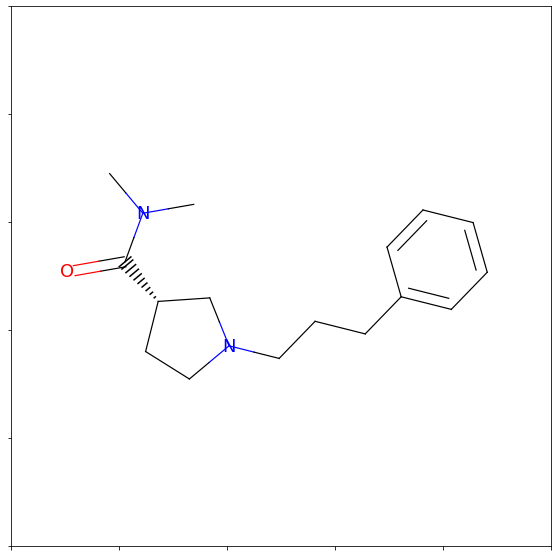

Invalid reconstruction!


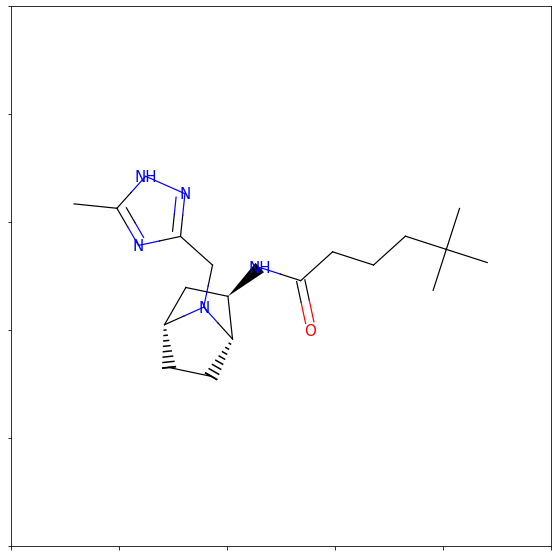

Invalid reconstruction!


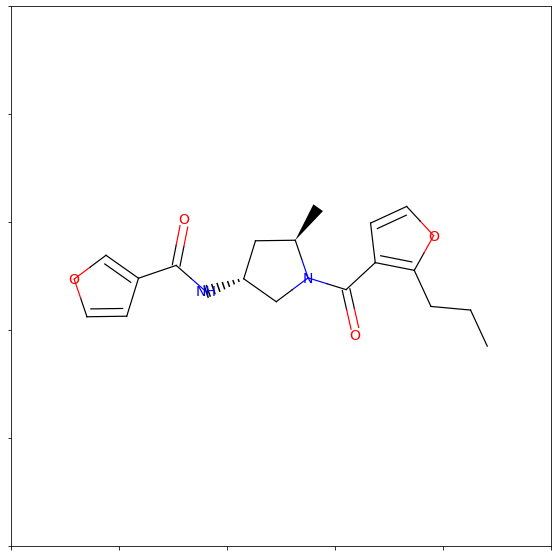

Invalid reconstruction!


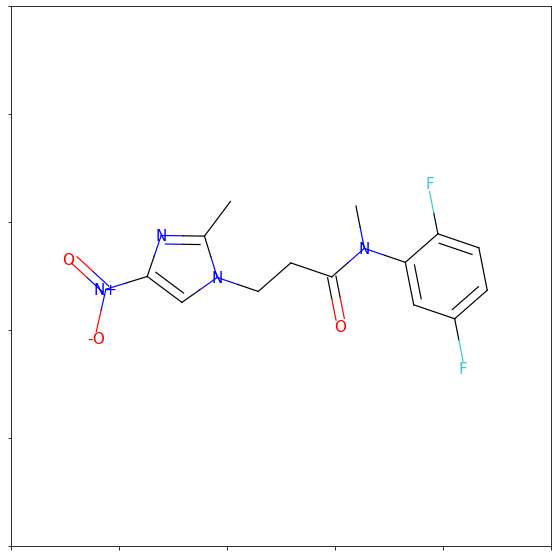

Invalid reconstruction!


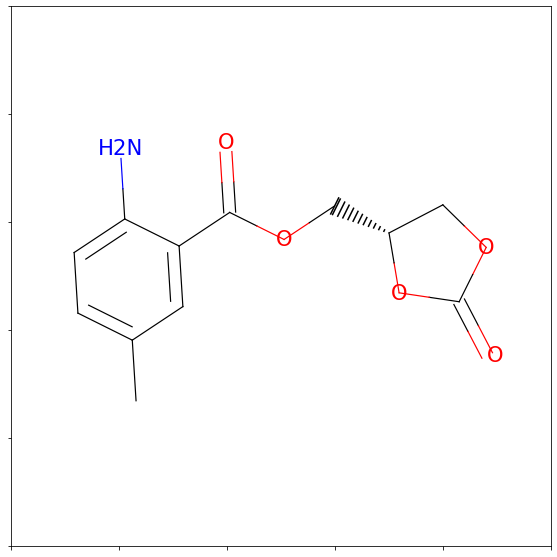

Invalid reconstruction!


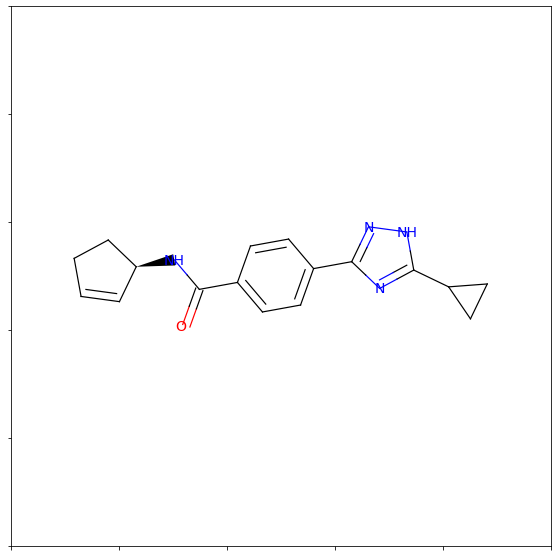

Invalid reconstruction!


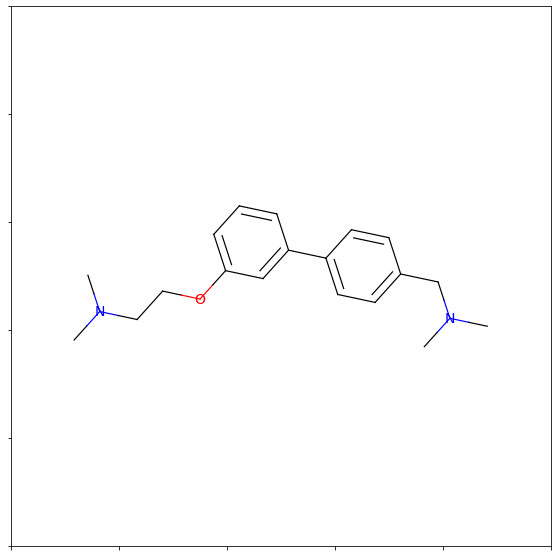

Invalid reconstruction!


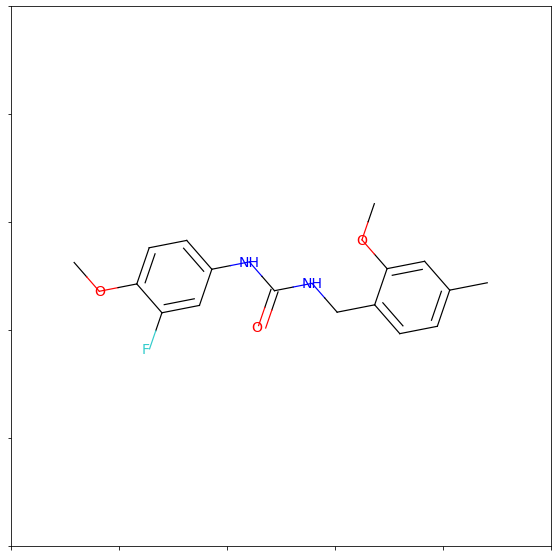

Invalid reconstruction!


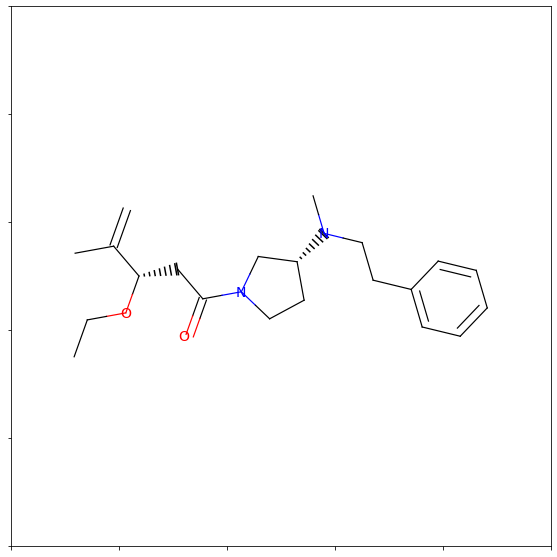

Invalid reconstruction!


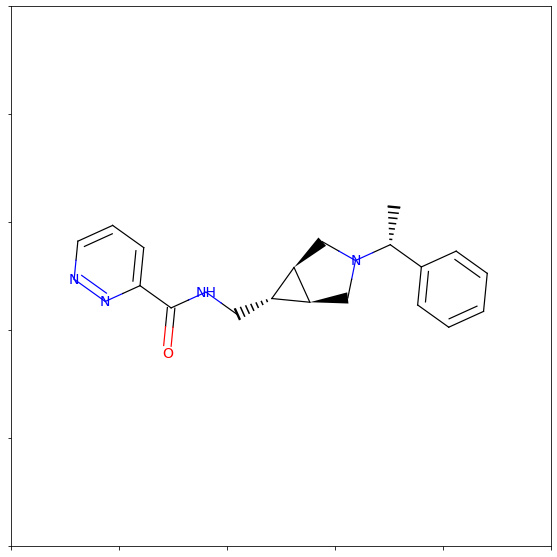

In [26]:
NUM_RECONS = 10

n = 0
k = 0

while n < NUM_RECONS and k < len(validation_mols):
    mols = reconstruction_mols[k], validation_mols[k]
    if mols[0] and mols[1]:
        mol_utils.draw_mols(mols, 2)
        plt.show()
        n += 1
    else:
        logging.info('Invalid reconstruction!')
        mol_utils.draw_mol(mols[1])
        plt.show()
    k += 1